In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import seaborn as sns
pal = sns.color_palette('tab10')
pal.as_hex()

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [3]:
# # df = pd.read_csv('./../../data/processed/.csv')

# sales = df.loc[df.IMPORT == 1].groupby(['ID', 'YEAR'])['VART'].sum().unstack()

# sales = sales.loc[sales.sum(1).sort_values().index]

# logsales = np.log10(sales)
# demlogsales = logsales.subtract(logsales.mean(1), axis = 0)

# sizes = sales.sum(1)


# Q = 10
# parts = pd.cut(sizes.cumsum()/sizes.sum(), Q, labels = range(Q)).sort_index()

In [4]:
# Sk = sales.groupby(parts).sum()
# # yqs.T.cov().sum().sum()

In [5]:
# X = Sk.sum() # == sales.sum()
# EX = X.mean()

# # Exact
# print(Sk.T.cov().sum().sum())
# print(X.var())

# # Aggregate approx
# print(np.log10(X).var()*(np.log(10)*EX)**2)

# # Sectoral log fluctuations
# # Sq = yqs.mean(1).mean() # approx un sq que es el valor lineal medio de los qs
# # Sq**2*np.log(10)**2*(np.log10(yqs).T.cov().sum().sum())
# print((EX/Q)**2*np.log(10)**2*(np.log10(Sk).T.cov().sum().sum()))

In [6]:
# logsales = np.log10(sales)

# micro_s = logsales.sub(logsales.mean(1), axis=0).unstack().std()
# zero_shock = logsales.notna().multiply(logsales.mean(1), axis = 0).replace(0, np.nan)

# # noise = np.power(10, zero_shock + simu_shocks) - np.power(10, zero_shock)

In [7]:
# common_R + noise_qs + base_qs - Sk == 0

In [8]:
# import seaborn as sns
# cm = sns.light_palette("green", as_cmap=True)


In [9]:
# nqs = parts.value_counts().values
# lognqs = np.log10(nqs)


In [10]:
### The outcome of bootstrap is having the zero shock time series of quantiles and the 'all included time series of quantiles'.

# Additive decomposition

In [11]:
# #### LOAD DATA

# n = 100
# Q = 10

# # legacy
# # size_sorting = False
# # bs_base = pd.read_csv('./../../data/bootstraps/bs_base_'+['random', 'sorted'][size_sorting]+'_m'+str(n)+'_q'+str(Q)+'csv', index_col=['q', 'm', 's', 'nqs'])
# # bs_totl = pd.read_csv('./../../data/bootstraps/bs_totl_'+['random', 'sorted'][size_sorting]+'_m'+str(n)+'_q'+str(Q)+'csv', index_col=['q', 'm', 's', 'nqs'])

# bs_base = pd.read_csv('./../../data/bootstraps/bs_base_m'+str(n)+'_q'+str(Q)+'_'+['X', 'M'][i]+'.csv', index_col=['q', 'm', 's', 'nqs'])
# bs_totl = pd.read_csv('./../../data/bootstraps/bs_totl_m'+str(n)+'_q'+str(Q)+'_'+['X', 'M'][i]+'.csv', index_col=['q', 'm', 's', 'nqs'])

# bs_base = bs_base.loc[bs_base.parts == 'P'].drop('parts', axis = 1)
# bs_totl = bs_totl.loc[bs_totl.parts == 'P'].drop('parts', axis = 1)

# ### ADDITIVE DECOMPOSITION

# bs_base = bs_base.groupby(level = ['s', 'q', 'm']).sum()  # drops the nq, it's not really grouping
# bs_totl = bs_totl.groupby(level = ['s', 'q', 'm']).sum()  # drops the nq, it's not really grouping
# fe_n = (bs_totl - bs_base)
# fe = fe_n.groupby(level = ['s', 'q']).transform('median') 
# noise = fe_n - fe

# ### MULTIPLICATIVE DECOMPOSITION

# mul_fe_noise = bs_totl/bs_base
# # Now, I use the bs to estimate disentangling fe from noise
# mul_fe = mul_fe_noise.groupby(level = ['s', 'q']).transform('median') 
# mul_noise = mul_fe_noise/mul_fe

# # Important: they fulfill
# # bs_totl - bs_base*mul_fe*mul_noise == 0
# # np.log10(bs_totl) - np.log10(bs_base) - np.log10(mul_fe) - np.log10(mul_noise) == 0

In [12]:
## Cov matrices of some experiments
R = 5
scale = 'lin'
sorted_ = False
n = 100
Q = 10

for i in [0, 1]:

    ###########################################################


    bs_base = pd.read_csv('./../../data/bootstraps/bs_base_m'+str(n)+'_q'+str(Q)+'_'+['X', 'M'][i]+'.csv', index_col=['q', 'm', 's', 'nqs'])
    bs_totl = pd.read_csv('./../../data/bootstraps/bs_totl_m'+str(n)+'_q'+str(Q)+'_'+['X', 'M'][i]+'.csv', index_col=['q', 'm', 's', 'nqs'])

    bs_base = bs_base.loc[bs_base.parts == 'P'].drop('parts', axis = 1)
    bs_totl = bs_totl.loc[bs_totl.parts == 'P'].drop('parts', axis = 1)
        
    for r in range(R):
    #     pick_m = np.random.choice(range(n))
        pick_m = [3, 6, 2, 5, 8][r]

        totl_ = bs_totl.loc[(bs_totl.index.get_level_values('m') == pick_m) & (bs_totl.index.get_level_values('s') == 0.5)]

## Sectoral structure

In [65]:
## Fitting with the mean curve
X = pd.DataFrame(totl_.mean())
Y = totl_.values

# This gives near one. 
betas = pd.DataFrame(np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(Y.T), ['beta'], totl_.index.get_level_values('q'))
betas # It's not just the shares # totl_.sum(1)/totl_.sum().sum()


## Fitting with a standardized line
T = 17; t = np.arange(0, T)
t_ = (t - t.mean())/t.std()
X[0] = t_ # overwrite
Y = (totl_.T - totl_.mean(1)).T.values # remove intercepts. # doesnt seem to change anything...

# This gives near one. 
betas = pd.DataFrame(np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(Y.T), ['beta'], totl_.index.get_level_values('q'))
betas # It's not just the shares # totl_.sum(1)/totl_.sum().sum()

q,0,1,2,3,4,5,6,7,8,9
beta,3.158815e+09,4.683012e+09,4.803696e+09,2.294720e+09,4.889384e+09,2.907366e+09,7.444055e+09,3.966511e+09,4.083861e+09,2.633967e+09


In [66]:
np.linalg.pinv(X.T.dot(X))#.dot(X.T).dot(Y.T)

array([[0.05882353]])

In [67]:
np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(Y.T)

array([[3.15881477e+09, 4.68301239e+09, 4.80369551e+09, 2.29472012e+09,
        4.88938383e+09, 2.90736638e+09, 7.44405483e+09, 3.96651085e+09,
        4.08386056e+09, 2.63396725e+09]])

In [68]:
(X.T).dot(Y.T).div((X**2).sum(), axis = 0)

,0,1,2,3,4,5,6,7,8,9
0,3.158815e+09,4.683012e+09,4.803696e+09,2.294720e+09,4.889384e+09,2.907366e+09,7.444055e+09,3.966511e+09,4.083861e+09,2.633967e+09


In [69]:
X.T

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,-1.632993,-1.428869,-1.224745,-1.020621,-0.816497,-0.612372,-0.408248,-0.204124,0.0,0.204124,0.408248,0.612372,0.816497,1.020621,1.224745,1.428869,1.632993


In [70]:
y = totl_
bX = pd.DataFrame(np.outer(betas.values, X. values), totl_.index, totl_.columns)
r = y - bX

In [71]:
bX.T.cov()

,,,q,0,1,2,3,4,5,6,7,8,9
,,,m,8,8,8,8,8,8,8,8,8,8
,,,s,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
,,,nqs,25979,25565,22606,22198,22141,20285,19906,19904,18662,13064
q,m,s,nqs,,,,,,,,,,
0,8,0.5,25979,1.060174e+19,1.571732e+19,1.612236e+19,7.701633e+18,1.640995e+19,9.757821e+18,2.498404e+19,1.331257e+19,1.370642e+19,8.840228e+18
1,8,0.5,25565,1.571732e+19,2.330127e+19,2.390175e+19,1.141784e+19,2.432811e+19,1.446618e+19,3.703939e+19,1.973617e+19,2.032007e+19,1.310583e+19
2,8,0.5,22606,1.612236e+19,2.390175e+19,2.451771e+19,1.171208e+19,2.495506e+19,1.483898e+19,3.799391e+19,2.024478e+19,2.084372e+19,1.344358e+19
3,8,0.5,22198,7.701633e+18,1.141784e+19,1.171208e+19,5.594849e+18,1.192100e+19,7.088567e+18,1.814965e+19,9.670909e+18,9.957024e+18,6.421981e+18
4,8,0.5,22141,1.640995e+19,2.432811e+19,2.495506e+19,1.192100e+19,2.540020e+19,1.510368e+19,3.867164e+19,2.060591e+19,2.121553e+19,1.368338e+19
5,8,0.5,20285,9.757821e+18,1.446618e+19,1.483898e+19,7.088567e+18,1.510368e+19,8.981078e+18,2.299526e+19,1.225286e+19,1.261536e+19,8.136527e+18


In [72]:
r.T.cov().sum().sum()  # it is about zero if fitting with the total line.

2.8168859562847974e+20

In [73]:
y.sum().var()

2.05604214624312e+21

In [74]:
bX.sum().var()

1.7743535506146397e+21

In [75]:
r.sum().var()

2.8168859562847987e+20

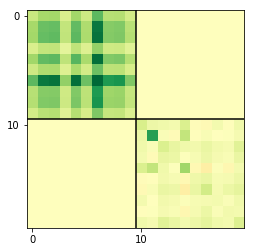

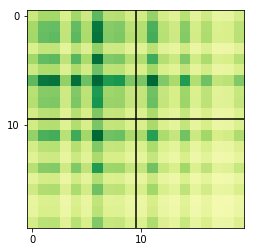

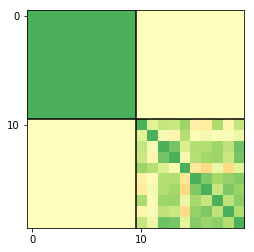

In [76]:
mat_data = pd.DataFrame(pd.concat([bX, r]).T.cov().values)
sigsig = pd.DataFrame(np.outer(np.sqrt(np.diag(mat_data)), np.sqrt(np.diag(mat_data))))

############################################
# fig, axs = plt.subplots(1, R, figsize = (4*R, 4))
fig, ax = plt.subplots(1, figsize = (4, 4))
scale = 4e19
# scale = 1.5

im = ax.imshow(mat_data, vmin = -scale, vmax = scale, cmap = 'RdYlGn')

# im = ax.imshow(mat_data > 1.5e18, vmin = -1, vmax = 1, cmap = 'RdYlGn')

# Show all ticks...
ax.set_xticks(np.arange(0, 2*Q, 10)); ax.set_yticks(np.arange(0, 2*Q, 10))
# Show block lines
ax.axhline(Q - .5, c = 'k'); ax.axvline(Q - .5, c = 'k')
# plt.savefig('./../../../WRITING/paper1_writing/figures/OLS1_cov.png')

plt.show()

############################################


fig, ax = plt.subplots(1, figsize = (4, 4))

scale = 4e19
im = ax.imshow(sigsig, vmin = -scale, vmax = scale, cmap = 'RdYlGn')

# Show all ticks...
ax.set_xticks(np.arange(0, 2*Q, 10)); ax.set_yticks(np.arange(0, 2*Q, 10))
# Show block lines
ax.axhline(Q - .5, c = 'k'); ax.axvline(Q - .5, c = 'k')
# plt.savefig('./../../../WRITING/paper1_writing/figures/OLS1_cov_outersig.png')

plt.show()

############################################


fig, ax = plt.subplots(1, figsize = (4, 4))

scale = 1.5
im = ax.imshow(mat_data/sigsig, vmin = -scale, vmax = scale, cmap = 'RdYlGn')
# im = ax.imshow(mat_data > 1.5e18, vmin = -1, vmax = 1, cmap = 'RdYlGn')

# Show all ticks...
ax.set_xticks(np.arange(0, 2*Q, 10)); ax.set_yticks(np.arange(0, 2*Q, 10))
# Show block lines
ax.axhline(Q - .5, c = 'k'); ax.axvline(Q - .5, c = 'k')
# plt.savefig('./../../../WRITING/paper1_writing/figures/OLS1_cov_div_outersig.png')

plt.show()

# ############################################
# # fig, axs = plt.subplots(1, R, figsize = (4*R, 4))
# fig, ax = plt.subplots(1, figsize = (6, 6))
# # scale = 4e19
# scale = 1.5

# im = ax.imshow((mat_data/sigsig) > .9999, vmin = -scale, vmax = scale, cmap = 'RdYlGn')

# # im = ax.imshow(mat_data > 1.5e18, vmin = -1, vmax = 1, cmap = 'RdYlGn')

# # Show all ticks...
# ax.set_xticks(np.arange(0, 2*Q, 10)); ax.set_yticks(np.arange(0, 2*Q, 10))
# # Show block lines
# ax.axhline(Q - .5, c = 'k'); ax.axvline(Q - .5, c = 'k')
# plt.savefig('./../../../WRITING/paper1_writing/figures/OLS_cov_3.png')

# plt.show()

In [29]:
## Sums by blocks

In [77]:
100*X.var()

0    106.25
dtype: float64

In [78]:
mat_data.sum().sum()

2.0560421462431192e+21

In [79]:
mat_data.iloc[:10, :10].sum().sum()

1.7743535506146391e+21

In [80]:
mat_data.iloc[10:, :10].sum().sum()### As if zero

-64503.6125592267

In [81]:
mat_data.iloc[:10, 10:].sum().sum() ### As if zero

-64503.612559226705

In [82]:
mat_data.iloc[10:, 10:].sum().sum() ### As if zero

2.8168859562847974e+20

In [84]:
## Cov matrices of some experiments
R = 5
scale = 'lin'
sorted_ = False

for i in [0, 1]:

    ###########################################################


    bs_base = pd.read_csv('./../../data/bootstraps/bs_base_m'+str(n)+'_q'+str(Q)+'_'+['X', 'M'][i]+'.csv', index_col=['q', 'm', 's', 'nqs'])
    bs_totl = pd.read_csv('./../../data/bootstraps/bs_totl_m'+str(n)+'_q'+str(Q)+'_'+['X', 'M'][i]+'.csv', index_col=['q', 'm', 's', 'nqs'])

    if sorted_:
        bs_base = bs_base.loc[bs_base.parts == 'Q'].drop('parts', axis = 1)
        bs_totl = bs_totl.loc[bs_totl.parts == 'Q'].drop('parts', axis = 1)
    else:
        bs_base = bs_base.loc[bs_base.parts == 'P'].drop('parts', axis = 1)
        bs_totl = bs_totl.loc[bs_totl.parts == 'P'].drop('parts', axis = 1)

    ### ADDITIVE DECOMPOSITION

    bs_base = bs_base.groupby(level = ['s', 'q', 'm']).sum()  # drops the nq, it's not really grouping
    bs_totl = bs_totl.groupby(level = ['s', 'q', 'm']).sum()  # drops the nq, it's not really grouping
    fe_n = (bs_totl - bs_base)
    fe = fe_n.groupby(level = ['s', 'q']).transform('median') 
    noise = fe_n - fe

    ### MULTIPLICATIVE DECOMPOSITION

    mul_fe_noise = bs_totl/bs_base
    # Now, I use the bs to estimate disentangling fe from noise
    mul_fe = mul_fe_noise.groupby(level = ['s', 'q']).transform('median') 
    mul_noise = mul_fe_noise/mul_fe

    ###########################################################

    fig, axs = plt.subplots(1, R, figsize = (4*R, 4))

    for r in range(R):
        ax = axs[r]
    #     pick_m = np.random.choice(range(n))
        pick_m = [3, 6, 2, 5, 8][r]

        totl_ = bs_totl.loc[bs_totl.index.get_level_values('m') == pick_m].loc[0.5]
        base_ = bs_base.loc[bs_base.index.get_level_values('m') == pick_m].loc[0.5]
        fe_n_ = fe_n.loc[fe_n.index.get_level_values('m') == pick_m].loc[0.5]
        noise_ = noise.loc[noise.index.get_level_values('m') == pick_m].loc[0.5]
        fe_ = fe.loc[fe.index.get_level_values('m') == pick_m].loc[0.5]

        # totl_ - base_ - fe_n_
        C = pd.concat([base_.T, fe_.T, noise_.T], axis=1).cov()

        scale = 'lin'

        mat_data = C.values; 
        print('sum:'+str(mat_data.sum())); print('trace:'+str(np.diagonal(mat_data).sum()));

        if scale == 'log': 
            c = 3
        else:
            c = -18

        mat_data_sc = mat_data*10**(c)

        im = ax.imshow(mat_data_sc, vmin = -5, vmax = 5, cmap = 'RdYlGn')

        # Show all ticks...
        ax.set_xticks(np.arange(0, 3*Q, 10))
        ax.set_yticks(np.arange(0, 3*Q, 10))
        # ... and label them with the respective list entries
        # ax.set_xticklabels(range(1, 3*Q + 1))
        # ax.set_yticklabels(range(1, 3*Q + 1))

        ax.axhline(2*Q - .5, c = 'k')
        ax.axvline(2*Q - .5, c = 'k')
        ax.axhline(Q - .5, c = 'k')
        ax.axvline(Q - .5, c = 'k')

    # plt.savefig('./../../../WRITING/paper1_writing/figures/full_crosscov_'+scale+'.png')
#     plt.savefig('./../../../WRITING/paper1_writing/figures/full_crosscov_exs_'+scale+'_'+['random', 'sorted'][sorted_]+'_'+['X', 'M'][i]+'.png')

    plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-84-78cfdecbfdf8>", line 11, in <module>
    bs_base = pd.read_csv('./../../data/bootstraps/bs_base_m'+str(n)+'_q'+str(Q)+'_'+['X', 'M'][i]+'.csv', index_col=['q', 'm', 's', 'nqs'])
  File "/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/pandas/io/parsers.py", line 702, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/pandas/io/parsers.py", line 411, in _read
    compression = _infer_compression(filepath_or_buffer, compression)
  File "/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/pandas/io/common.py", line 293, in _infer_compression
    filepath_or_buffer = _stringify_path(filepath_or_buffer)
  File "/home/miglesia

OSError: [Errno 5] Input/output error

In [ ]:
xx

## Plot components

In [ ]:


# logsales = np.log10(sales)
# demlogsales = logsales.subtract(logsales.mean(1), axis = 0)

# sizes = sales.sum(1)


# Q = 10
# parts = pd.cut(sizes.cumsum()/sizes.sum(), Q, labels = range(Q)).sort_index()

In [ ]:
from matplotlib.patches import Patch
from matplotlib.pyplot import Line2D

P = 10
s = 0.5
df = pd.read_csv('./../../data/processed/ID_Y.csv')

for i in [0, 1]:
    # # df = pd.read_csv('./../../data/processed/.csv')
    sales = df.loc[df.IMPORT == i].groupby(['ID', 'YEAR'])['VART'].sum().unstack()
    sales = sales.loc[sales.sum(1).sort_values().index]
    
    
    ###########################################################

    bs_base = pd.read_csv('./../../data/bootstraps/bs_base_m'+str(n)+'_q'+str(Q)+'_'+['X', 'M'][i]+'.csv', index_col=['q', 'm', 's', 'nqs'])
    bs_totl = pd.read_csv('./../../data/bootstraps/bs_totl_m'+str(n)+'_q'+str(Q)+'_'+['X', 'M'][i]+'.csv', index_col=['q', 'm', 's', 'nqs'])

    if sorted_:
        bs_base = bs_base.loc[bs_base.parts == 'Q'].drop('parts', axis = 1)
        bs_totl = bs_totl.loc[bs_totl.parts == 'Q'].drop('parts', axis = 1)
    else:
        bs_base = bs_base.loc[bs_base.parts == 'P'].drop('parts', axis = 1)
        bs_totl = bs_totl.loc[bs_totl.parts == 'P'].drop('parts', axis = 1)

    ### ADDITIVE DECOMPOSITION

    bs_base = bs_base.groupby(level = ['s', 'q', 'm']).sum()  # drops the nq, it's not really grouping
    bs_totl = bs_totl.groupby(level = ['s', 'q', 'm']).sum()  # drops the nq, it's not really grouping
    fe_n = (bs_totl - bs_base)
    fe = fe_n.groupby(level = ['s', 'q']).transform('median') 
    noise = fe_n - fe

    ### MULTIPLICATIVE DECOMPOSITION

    mul_fe_noise = bs_totl/bs_base
    # Now, I use the bs to estimate disentangling fe from noise
    mul_fe = mul_fe_noise.groupby(level = ['s', 'q']).transform('median') 
    mul_noise = mul_fe_noise/mul_fe

    ###########################################################
    
    

    print(['EXPORTS', 'IMPORTS'][i])
    fig, axs = plt.subplots(2, 3, figsize = (15, 7))
    ylim_scale = 1.5e11

    ax = axs[0][0]
    ax.set_title(r'Additive Base $B_{pt}$')
    deviations_info = bs_base.groupby(level = [0, 1]).mean().loc[s]
    deviations_info = P*deviations_info.subtract(deviations_info.mean(1), axis = 0)  # This is to subtract Sq from Bq

    deviations_info.T.plot(c = '.5', alpha = .35, legend = False, ax = ax)
    deviations_info.mean().plot(marker = 's', lw = 0, ax = ax, c = '#2ca02c')
    ax.set_ylim(-ylim_scale, ylim_scale)
    ax.axhline(0, lw = 1, c = '.5', linestyle = '--')
    ax.get_yticklabels()[4].set_backgroundcolor('yellow')


    ax = axs[0][1]
    ax.set_title(r'Additive Mean deviations $M_{pt}$')

    ## Full magnitude
    deviations_info = P*fe.groupby(level = [0, 1]).mean().loc[s]
    ax.axhline(deviations_info.mean().mean(), lw = 1, c = '.5', linestyle = ':')
    deviations_info.T.plot(c = '.5', alpha = .35, legend = False, ax = ax)
    deviations_info.mean().plot(marker = 's', lw = 0, c = '#d62728', ax = ax)

    ## Half magnitude
    deviations_info = P*fe.groupby(level = [0, 1]).mean().loc[0.25]
    ax.axhline(deviations_info.mean().mean(), lw = 1, c = '.5', linestyle = ':')
    deviations_info.T.plot(c = '.5', alpha = .1, legend = False, ax = ax)
    deviations_info.mean().plot(marker = 's', lw = 0, c = '#d62728', ax = ax, alpha = .3)

    ax.axhline(0, lw = 1, c = '.5', linestyle = '--')
    ax.set_ylim(-ylim_scale, ylim_scale)
    ax.get_yticklabels()[4].set_backgroundcolor('yellow')
    
    
    legend_elements = [Line2D([0], [0], marker='s', color='#d62728', label='full micro shocks', lw = 0),
                   Line2D([0], [0], marker='s', color='#d62728', label='half micro shocks', lw = 0, alpha = .3)]
    ax.legend(handles=legend_elements, loc='lower right')


    ax = axs[0][2]
    ax.set_title(r'Total Exports time series - mean')
    deviations_info = sales.sum().subtract(sales.sum().mean(), axis = 0)/2
    deviations_info.plot(marker = 's', lw = 1, ax = ax, legend = False)
    ax.axhline(0, lw = 1, c = '.5', linestyle = '--')
    ax.set_ylim(-ylim_scale, ylim_scale)
    ax.get_yticklabels()[4].set_backgroundcolor('yellow')
    
    ###########################################################    
    ylim_scale = 2
    
    ax = axs[1][0]
    ax.set_title(r'Multiplicative Base $b_{pt}$')
    deviations_info = bs_base.groupby(level = [0, 1]).mean().loc[s]
    deviations_info = deviations_info.div(deviations_info.mean(1), axis = 0)  # This is to subtract Sq from Bq
    deviations_info.T.plot(c = '.5', alpha = .35, legend = False, ax = ax)
    deviations_info.mean().plot(marker = 's', lw = 0, ax = ax, c = '#2ca02c')
    # ax.axhline(deviations_info.mean().mean(), lw = 4, c = 'r', linestyle = ':') # mean is on 1
    ax.axhline(1, lw = 1, c = '.5', linestyle = '--')
    ax.set_ylim(1/ylim_scale, ylim_scale)
    ax.get_yticklabels()[3].set_backgroundcolor('yellow')


    ax = axs[1][1]
    ax.set_title(r'Multiplicative Mean deviations $m_{pt}$')

    ## Full magnitude
    deviations_info = mul_fe.groupby(level = [0, 1]).mean().loc[s]
    deviations_info.T.plot(c = '.5', alpha = .35, legend = False, ax = ax)
    pts1 = deviations_info.mean().plot(marker = 's', lw = 0, ax = ax, c = '#d62728')
    ax.axhline(deviations_info.mean().mean(), lw = 1, c = '.5', linestyle = ':')

    ## Half magnitude
    deviations_info = mul_fe.groupby(level = [0, 1]).mean().loc[0.25]
    deviations_info.T.plot(c = '.5', alpha = .1, legend = False, ax = ax)
    pts2 = deviations_info.mean().plot(marker = 's', lw = 0, ax = ax, c = '#d62728', alpha = .3)
    ax.axhline(deviations_info.mean().mean(), lw = 1, c = '.5', linestyle = ':')

    ax.axhline(1, lw = 1, c = '.5', linestyle = '--')
    ax.set_ylim(1/ylim_scale, ylim_scale)
    ax.get_yticklabels()[3].set_backgroundcolor('yellow')

    legend_elements = [Line2D([0], [0], marker='s', color='#d62728', label='full micro shocks', lw = 0),
                   Line2D([0], [0], marker='s', color='#d62728', label='half micro shocks', lw = 0, alpha = .3)]
    ax.legend(handles=legend_elements, loc='lower right')


    ax = axs[1][2]
    ax.set_title(r'Total Exports time series / mean')
    (sales.sum()/sales.sum().mean()).plot(marker = 's', lw = 1, ax = ax, legend = False)
    ax.axhline(1, lw = 1, c = '.5', linestyle = '--')
    ax.set_ylim(1/ylim_scale, ylim_scale)
    ax.get_yticklabels()[3].set_backgroundcolor('yellow')

    plt.tight_layout()
    plt.savefig('./../../../WRITING/paper1_writing/figures/components_ts_'+['X', 'M'][i]+'.png')
    plt.show()

## * Possible Start

In [ ]:

# import pandas as pd
# import matplotlib.pyplot as plt
# %matplotlib inline
# import numpy as np

# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
# n = 100
# Q = 10

# # non-anonymous function
# def pct10 (x):
#     return np.percentile(x, q=10)

# def pct25 (x): 
#     return np.percentile(x, q=25)

# def pct75 (x): 
#     return np.percentile(x, q=75)

# def pct90 (x): 
#     return np.percentile(x, q=90)

In [ ]:

# #### LOAD DATA

# for size_sorting in [True, False]:
# #     bs_base = pd.read_csv('./../../data/bootstraps/bs_base_'+['random', 'sorted'][size_sorting]+'_m'+str(n)+'_q'+str(Q)+'csv', index_col=['q', 'm', 's', 'nqs'])
# #     bs_totl = pd.read_csv('./../../data/bootstraps/bs_totl_'+['random', 'sorted'][size_sorting]+'_m'+str(n)+'_q'+str(Q)+'csv', index_col=['q', 'm', 's', 'nqs'])
    
#     bs_base = pd.read_csv('./../../data/bootstraps/bs_base_m'+str(n)+'_q'+str(Q)+'csv', index_col=['q', 'm', 's', 'nqs'])
#     bs_totl = pd.read_csv('./../../data/bootstraps/bs_totl_m'+str(n)+'_q'+str(Q)+'csv', index_col=['q', 'm', 's', 'nqs'])
#     bs_base = bs_base.loc[bs_base.parts == ['P', 'Q'][size_sorting]].drop('parts', axis = 1)
#     bs_totl = bs_totl.loc[bs_totl.parts == ['P', 'Q'][size_sorting]].drop('parts', axis = 1)

#     ### ADDITIVE DECOMPOSITION

#     bs_base = bs_base.groupby(level = ['s', 'q', 'm']).sum()  # drops the nq, it's not really grouping
#     bs_totl = bs_totl.groupby(level = ['s', 'q', 'm']).sum()  # drops the nq, it's not really grouping
#     fe_n = (bs_totl - bs_base)
#     fe = fe_n.groupby(level = ['s', 'q']).transform('median') 
#     noise = fe_n - fe

#     ### MULTIPLICATIVE DECOMPOSITION

#     mul_fe_noise = bs_totl/bs_base
#     # Now, I use the bs to estimate disentangling fe from noise
#     mul_fe = mul_fe_noise.groupby(level = ['s', 'q']).transform('median') 
#     mul_noise = mul_fe_noise/mul_fe

#     # Important: they fulfill
#     # bs_totl - bs_base*mul_fe*mul_noise == 0
#     # np.log10(bs_totl) - np.log10(bs_base) - np.log10(mul_fe) - np.log10(mul_noise) == 0

#     for linear in [True, False]:

#         if linear:
#             BASE = bs_base
#             FE = fe
#             NOISE = noise
#         else:
#             BASE = np.log10(bs_base) # bs_base
#             FE = np.log10(mul_fe) # fe
#             NOISE = np.log10(mul_noise)# noise


#         result_list = []
#         obs_parts_cross_cov_list = []

#         for m in range(n):
#             if m%50 == 0: print(m)
#             for s in [.02, .05, .1, .25, .5]:
#                 base_m = BASE.loc[(BASE.index.get_level_values('m') == m) & (BASE.index.get_level_values('s') == s)]
#                 fe_m = FE.loc[(FE.index.get_level_values('m') == m) & (FE.index.get_level_values('s') == s)]
#                 n_m = NOISE.loc[(NOISE.index.get_level_values('m') == m) & (NOISE.index.get_level_values('s') == s)]

#                 obs_s_m = pd.concat([base_m, fe_m, n_m])
#                 obs_s_m.index = pd.MultiIndex.from_product([['base', 'FE', 'noise'],range(Q)], names = ['comp', 'part'])

#                 cov = obs_s_m.T.cov() # shape: 3Q x 3Q

#                 ####### OUTCOME 1
#     #           Save observed cross covariance of the parts

# #                 obs_parts_cross_cov = cov.loc['noise'][['noise']].stack(); obs_parts_cross_cov.index.names = ['partA', 'partB']; obs_parts_cross_cov.columns = ['cov']
# #                 obs_parts_cross_cov['m'] = m; obs_parts_cross_cov['s'] = s
# #                 obs_parts_cross_cov = obs_parts_cross_cov.reset_index().set_index(['s', 'm', 'partA', 'partB'])

# #                 obs_parts_cross_cov_list += [obs_parts_cross_cov]

#                 obs_parts_cross_cov = pd.DataFrame(cov.stack([0, 1]), columns = ['cov'])
#                 obs_parts_cross_cov.index.names = ['compA', 'partA', 'compB', 'partB']
#                 obs_parts_cross_cov['m'] = m; obs_parts_cross_cov['s'] = s
#                 obs_parts_cross_cov = obs_parts_cross_cov.reset_index().set_index(['s', 'm', 'compA', 'partA', 'compB', 'partB'])

#                 obs_parts_cross_cov_list += [obs_parts_cross_cov]


#                 # np.log10(abs(obs_s_m.T.cov())).round(1)

#                 ####### OUTCOME 2
#                 # Characterize diagonal and offdiagonal for all 3x3 cross components

#                 ## Make a mask for i = j
#                 ## Groupby the other level and (we need to sum) but possibly describe.
#                 part_index = np.array(3*Q*[cov.index.get_level_values('part').values])

#                 ## Mask for off diagonals
#                 part_diag_mask = np.equal(part_index, part_index.T)
#                 pd_diag_mask = pd.DataFrame(part_diag_mask, index = cov.index, columns = cov.columns)


#                 diag = cov[pd_diag_mask].stack([-2, -1]).groupby(level = [0, 2]).agg(['count', np.mean, np.sum, np.std, 
#                                                                                       pct10, pct25, pct75, pct90])
#                 diag = pd.concat([diag], keys=['diag'], names=['diag'], axis = 0)

#                 offdiag = cov[~pd_diag_mask].stack([-2, -1]).groupby(level = [0, 2]).agg(['count', np.mean, np.sum, np.std,
#                                                                                       pct10, pct25, pct75, pct90])
#                 offdiag = pd.concat([offdiag], keys=['offdiag'], names=['diag'], axis = 0)


#                 result_m = pd.concat([diag, offdiag])
#                 result_m = pd.concat([result_m], keys=[m], names=['m'], axis = 0)
#                 result_m = pd.concat([result_m], keys=[s], names=['s'], axis = 0)
#                 result_m.index.names = ['s', 'm', 'diag', 'compA', 'compB']

#                 result_list += [result_m]
                
#         result_varname = '_'.join(['cov_elements_desc', ['random', 'sorted'][size_sorting], ['log', 'lin'][linear]]); print(result_varname)
#         globals()[result_varname] = pd.concat(result_list)
        
        
#         result_varname = '_'.join(['parts_cross_cov', ['random', 'sorted'][size_sorting], ['log', 'lin'][linear]]); print(result_varname)
#         globals()[result_varname] = pd.concat(obs_parts_cross_cov_list)
                
# #         if linear:
# #             result_lin = pd.concat(result_list)
# #             result_parts_cross_cov_lin = pd.concat(obs_parts_cross_cov_list) ## adapt
# #         else:
# #             result_log = pd.concat(result_list)
# #             result_parts_cross_cov_log = pd.concat(obs_parts_cross_cov_list)


## Save cov matrix elements info

In [ ]:
# for i, df in enumerate([cov_elements_desc_sorted_lin, parts_cross_cov_sorted_lin, cov_elements_desc_sorted_log, 
#            parts_cross_cov_sorted_log, cov_elements_desc_random_lin, parts_cross_cov_random_lin, 
#                        cov_elements_desc_random_log, parts_cross_cov_random_log]):
#     name = ['cov_elements_desc_sorted_lin', 'parts_cross_cov_sorted_lin', 'cov_elements_desc_sorted_log', 
#            'parts_cross_cov_sorted_log', 'cov_elements_desc_random_lin', 'parts_cross_cov_random_lin', 
#            'cov_elements_desc_random_log', 'parts_cross_cov_random_log'][i];
    
#     df.to_csv('./../../data/bootstraps/'+name+'.csv')

In [ ]:
# pd.options.display.max_columns = 99
# pd.options.display.max_rows = 99

In [ ]:
# bs_base + fe + n - bs_totl == 0 . OK

# I want sum of cross covariance terms for components of the same m

# there are 6 varieties of combination (b, fe), (fe, n), (n, b), bb nn fefe, on diagonal (i = j) and off diagonal.

# Not sure what is a practical way to slice data and cov matrices...
# But anyway everything I want is just here.

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline

In [ ]:
# result_log_scaled = result_log.copy()
# result_log_scaled[['mean','sum','std']] = component_scale_factor*result_log[['mean','sum','std']]

In [ ]:
component_scale_factor = (((Sk/2).mean(1)*np.log(10))**2).mean()   ## This is (Sq*ln10)**2, but Sq/2 because of BS
component_scale_factor

## Load cov elements info

In [ ]:
for i in [0, 1]:
    for size_sorting in [True, False]:
        for linear in [True, False]:
            name = '_'.join(['cov_elements_desc', ['random', 'sorted'][size_sorting], ['log', 'lin'][linear], ['X', 'M'][i]]); print(name)
            globals()[name] = pd.read_csv('./../../data/bootstraps/'+name+'.csv')
            
            name = '_'.join(['parts_cross_cov', ['random', 'sorted'][size_sorting], ['log', 'lin'][linear], ['X', 'M'][i]]); print(name)
            globals()[name] = pd.read_csv('./../../data/bootstraps/'+name+'.csv')

## See Residuals
(Difference of cov elements from mean)

In [ ]:
# here just merge observed elements to mean values.
# then, columns can be subtracted.

# Mean of means. Can do it because for all m there are equal number of elements in each group.

df_desc = cov_elements_desc_sorted_lin_X
df_obs = parts_cross_cov_sorted_lin_X

mean_values = df_desc.groupby(['s', 'diag', 'compA', 'compB'])['mean'].mean().reset_index()

# the sigma i should be the sqrt of the diagonal terms.
sigmas = obs_mean.loc[(obs_mean.compA == obs_mean.compB) & (obs_mean.partA == obs_mean.partB)]
sigmas['std'] = np.sqrt(sigmas['cov'])
sigmas = sigmas.groupby(['s', 'compA','compB', 'diag'])['std'].mean().reset_index()


# len(df_desc)/9/2/100/5 == 1 # 9 blocks, diag-off diag, Q2, s

df_obs['diag'] = (df_obs.partA == df_obs.partB).map({True: 'diag', False: 'offdiag'})

df_obs.head()

obs_mean = df_obs.merge(mean_values[['s', 'compA', 'compB', 'diag', 'mean']])
obs_mean['diff'] = obs_mean['cov'] - obs_mean['mean']

obs_mean_sigmas = obs_mean.merge(sigmas[['s', 'compA', 'std']], on = ['s', 'compA']).merge(sigmas[['s', 'compB', 'std']], on = ['s', 'compB'])
obs_mean_sigmas = obs_mean_sigmas.rename(columns = {'std_x': 'std_A', 'std_y': 'std_B'})

obs_mean_sigmas['cov_ee'] = obs_mean_sigmas['diff']/ (obs_mean_sigmas['std_A'] * obs_mean_sigmas['std_B'])

# sq_devs = obs_mean_sigmas.loc[obs_mean_sigmas.s == 0.5].groupby(['compA','partA','compB','partB']).apply(lambda x: ((x['diff']/ x['std_A']/ x['std_B'])**2).mean())
# plt.imshow(sq_devs.unstack([0, 1]).values)
# sq_devs.unstack([0, 1]).round(1)

# df

In [ ]:
# plt.matshow(np.log10(sq_devs.unstack([0, 1]).values))
fig, axs = plt.subplots(3,3, figsize = (12, 12))
    
for i, compA in enumerate(['base', 'FE', 'noise']):
    for j, compB in enumerate(['base', 'FE', 'noise']):
        ax = axs[i][j]
        if i <= j:
            df = obs_mean_sigmas
            df = df.loc[df.s == 0.5]
            df = df.loc[(df.compA == compA) & (df.compB == compB)]

            for d in ['diag', 'offdiag']:
#                 print(len(df.loc[df.diag == d].cov_ee))
                ax.hist(df.loc[df.diag == d].cov_ee, np.arange(-2, 2, .15), normed = True, alpha = .5)
#                 ax.set_yscale('log')

        else:
            ax.set_axis_off()
                
plt.show()

## See mean values of Cov matrix

In [ ]:
# Older plots. Legacy.

# result = cov_elements_desc_random_lin
# plot_data = result.reset_index().groupby(['compA', 'compB', 'diag', 's']).mean().drop('m', axis = 1).reset_index()

# fig, axs = plt.subplots(3,3, figsize = (12, 12))
# # plot_data = result.reset_index().groupby(['compA', 'compB', 'diag', 's']).mean().drop('m', axis = 1).reset_index()
# plot_data['i'] = plot_data.compA.map({'FE': 1, 'base': 0, 'noise': 2})
# plot_data['j'] = plot_data.compB.map({'FE': 1, 'base': 0, 'noise': 2})

# # box titles 
# titles = np.array([[r'$cov(B_{it}, B_{jt})$', r'$cov(B_{it}, M_{jt})$', r'$cov(B_{it}, E_{jt})$'], ['', r'$cov(M_{it}, M_{jt})$', r'$cov(M_{it}, E_{jt})$'], ['','' , r'$cov(E_{it}, E_{jt})$']])

# for i in range(3):
#     for j in range(3):
#         ax = axs[i][j]
#         if i <= j:
#             ax.set_title(titles[i][j])
#             slice_data = plot_data.loc[(plot_data.i == i) & (plot_data.j == j)].reset_index(drop = True)

#             diag_data = slice_data.loc[slice_data.diag == 'diag']
#             p1 = ax.bar(diag_data.index, diag_data['mean'], yerr = diag_data['std'])

#             offdiag_data = slice_data.loc[slice_data.diag == 'offdiag']
#             p2 = ax.bar(offdiag_data.index + 1, offdiag_data['mean'], yerr = offdiag_data['std'])

#             ax.set_ylim(-3e18, 1e19)
            
#             labels = []
#             ax.set_xticks(list(diag_data.index) + list(offdiag_data.index + 1))
#             ax.set_xticklabels(slice_data.s.values, rotation=45, ha = 'right')
            
#             ax.legend((p1[0], p2[0]), (r'$i = j$', r'$i \neq j$'))
            
#             ax.axvline(5, c = '.5', lw = 1)
            
#             ax.set_xlabel('std of firm sales '+r'$(\sigma)$')

#         else:
#             ax.set_axis_off()
            
# plt.tight_layout()
# # plt.savefig('./../../../WRITING/paper1_writing/figures/components_crosscov.png')
# plt.show()

In [ ]:
# Blue, yellow colors.
# '#1f77b4',
#  '#ff7f0e',

In [ ]:

for i in [0, 1]:
    for k, result in enumerate([cov_elements_desc_random_lin_X, cov_elements_desc_sorted_lin_X,
                               cov_elements_desc_random_log_X, cov_elements_desc_sorted_log_X]): # arreglar X, M
        print(['Random Parts. Linear var', 'Quantile Parts. Linear var',
              'Random Parts. Log var', 'Quantile Parts. Log var'][k])

        plot_data = result.reset_index().groupby(['compA', 'compB', 'diag', 's']).mean().drop('m', axis = 1).reset_index()

        fig, axs = plt.subplots(3,3, figsize = (12, 12))
        # plot_data = result.reset_index().groupby(['compA', 'compB', 'diag', 's']).mean().drop('m', axis = 1).reset_index()
        plot_data['i'] = plot_data.compA.map({'FE': 1, 'base': 0, 'noise': 2})
        plot_data['j'] = plot_data.compB.map({'FE': 1, 'base': 0, 'noise': 2})

        # box titles 
        titles = np.array([[r'$cov(B_{it}, B_{jt})$', r'$cov(B_{it}, M_{jt})$', r'$cov(B_{it}, E_{jt})$'], ['', r'$cov(M_{it}, M_{jt})$', r'$cov(M_{it}, E_{jt})$'], ['','' , r'$cov(E_{it}, E_{jt})$']])

        for i in range(3):
            for j in range(3):
                ax = axs[i][j]
                if i <= j:
                    ax.set_title(titles[i][j])
                    slice_data = plot_data.loc[(plot_data.i == i) & (plot_data.j == j)].reset_index(drop = True)

                    diag_data = slice_data.loc[slice_data.diag == 'diag']
        #             p1 = ax.bar(diag_data.index, diag_data['mean'], yerr = diag_data['std'])

                    x = diag_data.index; y = diag_data['mean'];
                    p11 = ax.plot(x, y, marker = '.', lw = 0, c = 'k')
                    p12 = ax.bar(x, bottom = diag_data['pct25'], height = diag_data['pct75'] - diag_data['pct25'], width = .3, alpha = .5, color = '#1f77b4')
                    p13 = ax.bar(x, bottom = diag_data['pct10'], height = diag_data['pct90'] - diag_data['pct10'], width = .15, alpha = .5, color = '#1f77b4')

                    offdiag_data = slice_data.loc[slice_data.diag == 'offdiag']
        #             p2 = ax.bar(offdiag_data.index + 1, offdiag_data['mean'], yerr = offdiag_data['std'])
                    x = offdiag_data.index + 1; y = offdiag_data['mean'];
                    p21 = ax.plot(x, y, marker = '.', lw = 0, c = 'k')
                    p22 = ax.bar(x, bottom = offdiag_data['pct25'], height = offdiag_data['pct75'] - offdiag_data['pct25'], width = .3, alpha = .5, color = '#ff7f0e')
                    p33 = ax.bar(x, bottom = offdiag_data['pct10'], height = offdiag_data['pct90'] - offdiag_data['pct10'], width = .15, alpha = .5, color = '#ff7f0e')

                    if k >= 2: # Log variances
                        ax.set_ylim(-0.0025, 0.0125)
                    else: # Linear variances
                        ax.set_ylim(-.5e19, 2.5e19)

                    ax.axhline(0, c = '.5', alpha = .6)

                    labels = []
                    ax.set_xticks(list(diag_data.index) + list(offdiag_data.index + 1))
                    ax.set_xticklabels(slice_data.s.values, rotation=45, ha = 'right')

                    ax.legend((p11[0], p12[0], p22[0]), ('mean', r'$i = j$', r'$i \neq j$'))#, , r'$i \neq j$'))

                    ax.axvline(5, c = '.5', lw = 1)

                    ax.set_xlabel('var of firm sales '+r'$(\sigma^2)$')

                else:
                    ax.set_axis_off()

        plt.tight_layout()
        filetag = ['P_lin', 'Q_lin', 'P_log', 'Q_log'][k]
        plt.savefig('./../../../WRITING/paper1_writing/figures/components_crosscov_'+filetag+'_'+['X', 'M'][i]+'.png')
        plt.show()

## Cross covariances of parts

In [ ]:
# # parts_cross_cov_random_log.groupby(['s', 'partA', 'partB']).agg(['mean', 'median', 'std'])

# m_pick = np.random.choice(range(n))

# cov_vals = parts_cross_cov_random_log

# cov_vals = cov_vals.loc[(cov_vals.m == m_pick) & (cov_vals.s == .5)]

# cov_vals = cov_vals.set_index(['partA', 'partB'])[['cov']].unstack()

# pd.DataFrame(np.flip(cov_vals.values))

In [ ]:
for name in ['cov_elements_desc_sorted_lin', 'parts_cross_cov_sorted_lin', 'cov_elements_desc_sorted_log', 
           'parts_cross_cov_sorted_log', 'cov_elements_desc_random_lin', 'parts_cross_cov_random_lin',
            'cov_elements_desc_random_log', 'parts_cross_cov_random_log']:
    globals()[name] = pd.read_csv('./../../data/bootstraps/'+name+'.csv')

    

In [ ]:
# parts_cross_cov_random_log['partA'] = Q - parts_cross_cov_random_log['partA']
# parts_cross_cov_random_log['partB'] = Q - parts_cross_cov_random_log['partB']

# parts_cross_cov_sorted_log['partA'] = Q - parts_cross_cov_sorted_log['partA']
# parts_cross_cov_sorted_log['partB'] = Q - parts_cross_cov_sorted_log['partB']

# parts_cross_cov_random_lin['partA'] = Q - parts_cross_cov_random_lin['partA']
# parts_cross_cov_random_lin['partB'] = Q - parts_cross_cov_random_lin['partB']

# parts_cross_cov_sorted_lin['partA'] = Q - parts_cross_cov_sorted_lin['partA']
# parts_cross_cov_sorted_lin['partB'] = Q - parts_cross_cov_sorted_lin['partB']

In [ ]:
# df.loc[0.5]['cov']['median'].unstack([-2, -1])

In [ ]:

for scale in ['lin', 'log']:

    if scale == 'log':
        rand = parts_cross_cov_random_log.groupby(['s', 'compA', 'partA', 'compB', 'partB']).agg(['mean', 'median', 'std'])
        sort = parts_cross_cov_sorted_log.groupby(['s', 'compA', 'partA', 'compB', 'partB']).agg(['mean', 'median', 'std'])
    else:
        rand = parts_cross_cov_random_lin.groupby(['s', 'compA', 'partA', 'compB', 'partB']).agg(['mean', 'median', 'std'])
        sort = parts_cross_cov_sorted_lin.groupby(['s', 'compA', 'partA', 'compB', 'partB']).agg(['mean', 'median', 'std'])


    fig, axs = plt.subplots(1, 2, figsize = (15, 7))

    for i, df in enumerate([rand, sort]):
        ax = axs[i]
        mat_data = df.loc[0.5]['cov']['mean'].unstack([-2, -1])
        mat_data = mat_data.reindex(['noise', 'FE', 'base'], level = 0).reindex(['noise', 'FE', 'base'], level = 0, axis = 1) # Custom shuffle of components
        mat_data = np.flip(mat_data.values);# Flip for desired order of quantiles
        
        print('sum:'+str(mat_data.sum())); print('trace:'+str(np.diagonal(mat_data).sum()));
               
        std_data = df.loc[0.5]['cov']['std'].unstack([-2, -1])
        std_data = std_data.reindex(['noise', 'FE', 'base'], level = 0).reindex(['noise', 'FE', 'base'], level = 0, axis = 1) # Custom shuffle of components
        std_data = np.flip(std_data.values);# Flip for desired order of quantiles
        
        avg_magnitude = np.log10(abs(mat_data).mean()).round(); #c = int(-avg_magnitude)

        if scale == 'log': 
            c = 3
        else:
            c = -18
        
        mat_data_sc = mat_data*10**(c)
        std_data_sc = std_data*10**(c)

#         display(mat_data_sc)
        im = ax.imshow(mat_data_sc, vmin = -4, vmax = 4, cmap = 'RdYlGn')

#         # Show all ticks...
#         ax.set_xticks(range(Q))
#         ax.set_yticks(range(Q))
#         # ... and label them with the respective list entries
#         ax.set_xticklabels(range(1, Q + 1))
#         ax.set_yticklabels(range(1, Q + 1))

        # Anotate cov labels  
        if scale == 'lin':
            for c1, x in enumerate(range(3)):
                for c2, y in enumerate(range(3)):
                    x = [4.5, 14.5, 24.5][c1]
                    y = [4.5, 14.5, 24.5][c2]
                    if x>=y:
                        text = ax.text(x, y, r'$ cov('+['B_i', 'M_i', 'E_i'][c1]+', '+['B_j', 'M_j', 'E_j'][c2]+')$',
                                           ha="center", va="center", color="k", fontsize = 16)
                    
        if scale == 'log':
            for c1, x in enumerate(range(3)):
                for c2, y in enumerate(range(3)):
                    x = [4.5, 14.5, 24.5][c1]
                    y = [4.5, 14.5, 24.5][c2]
                    if x>=y:
                        text = ax.text(x, y, r'$ cov('+['b_i', 'm_i', '\sigma_i \epsilon_i'][c1]+', '+['b_j', 'm_j', '\sigma_j \epsilon_j'][c2]+')$',
                                           ha="center", va="center", color="k", fontsize = 16)
            
                

        ax.set_title(['Random Parts. ', 'Quantile Parts. '][i] + "Cross covariances ("+ scale + ')', fontsize = 14)
        
        # Block lines
        ax.axhline(2*Q - .5, c = 'k')
        ax.axvline(2*Q - .5, c = 'k')
        ax.axhline(Q - .5, c = 'k')
        ax.axvline(Q - .5, c = 'k')

    
    fig.tight_layout()

#     plt.savefig('./../../../WRITING/paper1_writing/figures/parts_crosscov_'+scale+'.png')
    plt.savefig('./../../../WRITING/paper1_writing/figures/full_crosscov_'+scale+'.png')

    plt.show()

In [ ]:
r'$ cov('+['B_i', 'M_i', 'E_i'][c1]+', '+['B_j', 'M_j', 'E_j'][c2]+')$'

In [ ]:

for scale in ['lin', 'log']:

    if scale == 'log':
        rand = parts_cross_cov_random_log.groupby(['s', 'partA', 'partB']).agg(['mean', 'median', 'std'])
        sort = parts_cross_cov_sorted_log.groupby(['s', 'partA', 'partB']).agg(['mean', 'median', 'std'])
    else:
        rand = parts_cross_cov_random_lin.groupby(['s', 'partA', 'partB']).agg(['mean', 'median', 'std'])
        sort = parts_cross_cov_sorted_lin.groupby(['s', 'partA', 'partB']).agg(['mean', 'median', 'std'])


    fig, axs = plt.subplots(1, 2, figsize = (15, 7))

    for i, df in enumerate([rand, sort]):
        ax = axs[i]
        mat_data = np.flip(df.loc[0.5]['cov']['median'].unstack().values); 
        print('sum:'+str(mat_data.sum())); print('trace:'+str(np.diagonal(mat_data).sum()));
        
        std_data = np.flip(df.loc[0.5]['cov']['std'].unstack().values)
        avg_magnitude = np.log10(abs(mat_data).mean()).round(); #c = int(-avg_magnitude)

        if scale == 'log': 
            c = 3
        else:
            c = -18
        
        mat_data_sc = mat_data*10**(c)
        std_data_sc = std_data*10**(c)

#         display(mat_data_sc)
        im = ax.imshow(mat_data_sc, vmin = -1, vmax = 1, cmap = 'RdYlGn')

        # Show all ticks...
        ax.set_xticks(range(Q))
        ax.set_yticks(range(Q))
        # ... and label them with the respective list entries
        ax.set_xticklabels(range(1, Q + 1))
        ax.set_yticklabels(range(1, Q + 1))

        # Anotate mean values
        for i in range(Q):
            for j in range(Q):
                if abs(mat_data_sc[i, j]) > .8:
                    text = ax.text(j, i-.1, round(mat_data_sc[i, j], 1),
                                   ha="center", va="center", color="w")
                else: 
                    text = ax.text(j, i-.1, round(mat_data_sc[i, j], 1),
                                   ha="center", va="center", color="k")

        # Anotate stds
        for i in range(Q):
            for j in range(Q):
                if abs(mat_data_sc[i, j]) > .8:
                    text = ax.text(j, i+.2, r'$\pm\ $'+str(round(std_data_sc[i, j], 1)),
                                   ha="center", va="center", color="w")
                else: 
                    text = ax.text(j, i+.2, r'$\pm\ $'+str(round(std_data_sc[i, j], 1)),
                                   ha="center", va="center", color="k")

        ax.set_title("cross covariances" + r'$\times 10^{{{}}}$'.format(c))
    fig.tight_layout()

    plt.savefig('./../../../WRITING/paper1_writing/figures/parts_crosscov_'+scale+'.png')
    plt.show()

In [ ]:
xx

In [ ]:
bs_result = pd.concat(out_list)
# data = bs_result.groupby(['q', 's']).agg(['mean', 'std']).drop('m', axis = 1)
data = bs_result.groupby(['q', 's']).median().drop('m', axis = 1)

In [ ]:
fig, axs = plt.subplots(1, 5, figsize = (30, 5))


for i, s in enumerate([.02, .05, .1, .25, .5]):
    ax = axs[i]
    data_s = data.loc[data.index.get_level_values('s') == s]
    lognqs = np.log10(data_s.nqs).values

    ax.plot(lognqs, np.log10(np.sqrt(data_s['yqs_var'].values)), marker = 'o', label = 'total') # actual std of quantiles
    ax.plot(lognqs, np.log10(np.sqrt(data_s['noise_var'].values)), marker = 'o', label = 'n') # std of statistical noise
    ax.plot(lognqs, np.log10(np.sqrt(data_s['base_var'].values)), marker = 'o', label = 'bias') # std of bias
    ax.plot(lognqs, np.log10(np.sqrt(data_s['common_R_var'].values)), label = 'common') # std of the common trend
    ax.plot(lognqs, np.log10(np.sqrt(data_s['common_R_var'].values) /5), label = 'common', lw = .5, c = '.5') # std of the common trend
    ax.plot(lognqs, np.log10(np.sqrt(data_s['common_R_var'].values + data_s['base_var'].values + data_s['noise_var'].values)), linestyle = '--', c = '.5', label = 'diag exp') # std of the common trend
    ax.plot(lognqs, .5*i + 8.3-lognqs/2, label = '1/sqrt(n)', lw = .5, c = '.5')
    ax.legend(loc = (1, .5))
    ax.set_ylim(7, 10)
plt.show()

In [ ]:
## Same thing but I want no biases. So, I want an effective nq and use a lognormal > 3 CDF levels, over T = 17 as base on which to add shocks. Also, now the shocks will be randomised (within quantile?)

## Zero BIAS

### Load data

In [ ]:
df = pd.read_csv('./../../data/processed/ID_Y.csv')
# df = pd.read_csv('./../../data/processed/.csv')

sales = df.loc[df.IMPORT == 0].groupby(['ID', 'YEAR'])['VART'].sum().unstack()
sales = sales.loc[sales.sum(1).sort_values().index]

logsales = np.log10(sales)
demlogsales = logsales.subtract(logsales.mean(1), axis = 0)

sizes = sales.loc[sales.sum(1).sort_values().index].sum(1)

Q = 10
parts = pd.cut(sizes.cumsum()/sizes.sum(), Q, labels = range(Q)).sort_index()

In [ ]:
## Effective Nq
eff_nq = sales.groupby(parts).count().mean(1).round().astype(int)
eff_nq

### Size dist Params

In [ ]:
from scipy.stats import norm
# from scipy.stats import norm
# from scipy.stats import pareto
from scipy.special import erf

#  - Lognormal clipped x > 3. 
sigma = 1.2810683494198207 # 1.3149476902828778
mu = 4.536908110675739 # 4.470439741406725
# 11.5% of guys that would be below the .3 threshold.
z = (mu - 3)/sigma
cum_th = 1 - .5*(1 + erf(z/np.sqrt(2)))

# emp_nq_med = nq.groupby(level = 0).median()
N = int(eff_nq.sum().round())

N_ = int(round(N/(1 - cum_th))) # We use a larger N ..
# From the theoretical N and the ppf we can know the theoretical quantiles
x_logn_clip3 = np.array([norm.ppf(q, mu, sigma) for q in np.arange(0, 1, 1/N_) + .5/N_])
x_logn_clip3 = x_logn_clip3[(-N - 1):-1]


T = 17

In [ ]:
s0 = pd.Series(np.power(10, x_logn_clip3))

s0_n = s0.groupby(pd.cut(s0.cumsum()/s0.sum(), Q, labels = range(Q))).count()
bs_n = eff_nq.round(1)

show = pd.concat([bs_n, s0_n], axis = 1); show.columns = ['Bootstrap nq', 'Lognormal >3 synthetic dist']
show

In [ ]:
# simu_shocks = (s/micro_s)*logsales.sub(logsales.mean(1), axis = 0)

### Decomposition into Common shocks and noise

In [ ]:

dem = logsales.sub(logsales.mean(1), axis = 0)
sample_shocks = dem.loc[dem.count(1) > 1].unstack().dropna() # (1.6 m real shocks)
micro_s = logsales.sub(logsales.mean(1), axis=0).unstack().std()
zero_shock = pd.DataFrame(pd.concat(T * [pd.Series(x_logn_clip3)], axis = 1))
zero_shock.columns = sales.columns

out_list = []

n = 50
Q = 10

for m in range(n):
    print(m)
    for s in [.02, .05, .1, .25, .5]:

#         df_bs = sales.sample(frac = .5)
#         df_bs = df_bs.loc[df_bs.sum(1).sort_values().index] #sorting

#         logsales = np.log10(sales)
        simu_shocks = pd.DataFrame((s/micro_s)*np.random.choice(sample_shocks.values, zero_shock.shape))
        simu_shocks.columns = sales.columns

#         micro_s = logsales.sub(logsales.mean(1), axis=0).unstack().std()
#         zero_shock = logsales.notna().multiply(logsales.mean(1), axis = 0).replace(0, np.nan)
        
#         simu_shocks = (s/micro_s)*logsales.sub(logsales.mean(1), axis = 0)

        total = np.power(10, zero_shock + simu_shocks)
        base = np.power(10, zero_shock)
        noise = np.power(10, zero_shock + simu_shocks) - np.power(10, zero_shock)
        
        total['q'] = pd.cut(total.sum(1).cumsum(), Q, labels = range(Q))

        common_R = noise.groupby(total['q']).sum().median()
        # optional, broadcast to 2d Q x T
        common_R = pd.DataFrame(np.outer(np.ones(Q), common_R.values), columns=common_R.index)

        noise_qs = noise.groupby(total['q']).sum() - common_R
        base_qs = base.groupby(total['q']).sum()
        yqs = common_R + noise_qs + base_qs
        
        nqs = total['q'].value_counts().values
#         lognqs = np.log10(nqs)
        
        out = pd.concat([yqs.var(1), noise_qs.var(1), base_qs.var(1), common_R.var(1)], axis = 1)
        out.columns = ['yqs_var', 'noise_var', 'base_var', 'common_R_var']
        out['q'] = range(Q); out['m'] = m; out['nqs'] = nqs; out['s'] = s;

        out_list += [out]

In [ ]:
bs_result = pd.concat(out_list)
# data = bs_result.groupby(['q', 's']).agg(['mean', 'std']).drop('m', axis = 1)
data = bs_result.groupby(['q', 's']).median().drop('m', axis = 1)

In [ ]:
fig, axs = plt.subplots(1, 5, figsize = (30, 5))


for i, s in enumerate([.02, .05, .1, .25, .5]):
    ax = axs[i]
    data_s = data.loc[data.index.get_level_values('s') == s]
    lognqs = np.log10(data_s.nqs).values

    ax.plot(lognqs, np.log10(np.sqrt(data_s['yqs_var'].values)), marker = 'o', label = 'total') # actual std of quantiles
    ax.plot(lognqs, np.log10(np.sqrt(data_s['noise_var'].values)), marker = 'o', label = 'n') # std of statistical noise
#     ax.plot(lognqs, np.log10(np.sqrt(data_s['base_var'].values)), marker = 'o', label = 'bias') # std of bias
    ax.plot(lognqs, np.log10(np.sqrt(data_s['common_R_var'].values)), label = 'common') # std of the common trend
    ax.plot(lognqs, np.log10(np.sqrt(data_s['common_R_var'].values) /5), label = 'common', lw = .5, c = '.5') # std of the common trend
    ax.plot(lognqs, np.log10(np.sqrt(data_s['common_R_var'].values + data_s['base_var'].values + data_s['noise_var'].values)), linestyle = '--', c = '.5', label = 'diag exp') # std of the common trend
    ax.plot(lognqs, .5*i + 8.3-lognqs/2, label = '1/sqrt(n)', lw = .5, c = '.5')
    ax.legend(loc = (1, .5))
    ax.set_ylim(7, 11)
plt.tight_layout()
plt.show()

### Decomposition into only noise

In [ ]:

dem = logsales.sub(logsales.mean(1), axis = 0)
sample_shocks = dem.loc[dem.count(1) > 1].unstack().dropna() # (1.6 m real shocks)
micro_s = logsales.sub(logsales.mean(1), axis=0).unstack().std()
zero_shock = pd.DataFrame(pd.concat(T * [pd.Series(x_logn_clip3)], axis = 1))
zero_shock.columns = sales.columns

out_list = []

n = 50
Q = 10

for m in range(n):
    print(m)
    for s in [.02, .05, .1, .25, .5]:

#         df_bs = sales.sample(frac = .5)
#         df_bs = df_bs.loc[df_bs.sum(1).sort_values().index] #sorting

#         logsales = np.log10(sales)
        simu_shocks = pd.DataFrame((s/micro_s)*np.random.choice(sample_shocks.values, zero_shock.shape))
        simu_shocks.columns = sales.columns

        total = np.power(10, zero_shock + simu_shocks)
        base = np.power(10, zero_shock) # Is really frozen in this case
        noise = np.power(10, zero_shock + simu_shocks) - np.power(10, zero_shock)
        
        total['q'] = pd.cut(total.sum(1).cumsum(), Q, labels = range(Q))

        noise_qs = noise.groupby(total['q']).sum()
        base_qs = base.groupby(total['q']).sum()
        yqs = noise_qs + base_qs
        
        nqs = total['q'].value_counts().values
#         lognqs = np.log10(nqs)
        
        out = pd.concat([yqs.var(1), noise_qs.var(1), base_qs.var(1)], axis = 1)
        out.columns = ['yqs_var', 'noise_var', 'base_var']
        out['q'] = range(Q); out['m'] = m; out['nqs'] = nqs; out['s'] = s;

        out_list += [out]

In [ ]:
bs_result = pd.concat(out_list).reset_index(drop = True)
# data = bs_result.groupby(['q', 's']).agg(['mean', 'std']).drop('m', axis = 1)
data = bs_result.groupby(['q', 's']).median().drop('m', axis = 1)

In [ ]:
## Fit the 1/n

fit_data = np.log10(data[['nqs', 'yqs_var']])

for s in fit_data.index.get_level_values('s').unique():
    fit_data_s = fit_data.loc[fit_data.index.get_level_values('s') == s]
    fit_data_s = fit_data_s.loc[fit_data_s.nqs < 4]

    x = fit_data_s.nqs
    y = fit_data_s.yqs_var
    z = np.polyfit(x, y, 1); p = np.poly1d(z);
    
    print(s, p/2)

In [ ]:
fig, axs = plt.subplots(1, 5, figsize = (30, 5))


for i, s in enumerate([.02, .05, .1, .25, .5]):
    ax = axs[i]
    data_s = data.loc[data.index.get_level_values('s') == s]
    lognqs = np.log10(data_s.nqs).values

    ax.plot(lognqs, np.log10(np.sqrt(data_s['yqs_var'].values)), marker = 'o', label = 'total') # actual std of quantiles
    ax.plot(lognqs, np.log10(np.sqrt(data_s['noise_var'].values)), marker = 'o', label = 'n') # std of statistical noise

    ax.plot(lognqs, .5*i + 8.3-lognqs/2, label = '1/sqrt(n)', lw = .5, c = '.5')
    ax.legend(loc = (1, .5))
    ax.set_ylim(7, 11)
plt.tight_layout()
plt.show()

In [ ]:
xx

In [ ]:
total =  quantile bases: [ np.power(10, zero_shock) ]  +  quantile noises: [ np.power(10, zero_shock + simu_shocks) - np.power(10, zero_shock) ] = line + shocks + quantiles

In [ ]:
# total = np.power(10, zero_shock + simu_shocks)
# base = np.power(10, zero_shock)
# noise = np.power(10, zero_shock + simu_shocks) - np.power(10, zero_shock)

# total_q = total.groupby(df_bs['q']).sum()
# base_q = base.groupby(df_bs['q']).sum()
# noise_q = noise.groupby(df_bs['q']).sum()

# q = 5
# print(total_q.iloc[q].var())
# print(pd.concat([noise_q.iloc[q], base_q.iloc[q]], axis = 1).cov().sum().sum())

# for q in range(Q):
#     print(q)
#     (( np.power(10, zero_shock + simu_shocks)).groupby(total['q']).sum()).iloc[q].plot()#.T.plot(legend = False)

#     (np.power(10, zero_shock).groupby(total['q']).sum()).iloc[q].plot()#.T.plot(legend = False)

#     ((np.power(10, zero_shock + simu_shocks) - np.power(10, zero_shock)).groupby(total['q']).sum()).iloc[q].plot(linestyle = '--')#.T.plot(legend = False)
#     plt.ylim(0, 2.5e10)

#     plt.show()

In [ ]:
## Non scaled, sanity check.

In [ ]:
# out_list = []
qs_bs_list = []
parts_bs_list = []
# nq_list = []
# trend_std_list = []

n = 50
Q = 10

for m in range(n):

    df_bs = sales.sample(frac = .5)
    df_bs = df_bs.loc[df_bs.sum(1).sort_values().index] #sorting

    df_bs['q'] = pd.cut(df_bs.sum(1).cumsum(), Q, labels = range(Q))

    nq = df_bs.groupby('q').count().mean(1) ## Effective nq
#     nq = df_bs.q.value_counts()  ## Total count n

    df_bs = df_bs.groupby('q').sum()

    common_trend = df_bs.median()

    x = np.log10(common_trend).index.astype(int).values
    y = np.log10(common_trend).values
    z = np.polyfit(x, y, 1); p = np.poly1d(z);

    exp_curve = pd.Series(np.power(10, p(x)), index = x)

#         df_bs = df_bs/(.5 * exp_curve)
    shocks = common_trend/exp_curve
    df_bs = df_bs/(shocks*exp_curve) # == df_bs/common_trend

    parts_bs_2 = pd.concat([exp_curve, shocks, df_bs.sum()], axis = 1).T
    parts_bs_2['m'] = m; parts_bs_2['s'] = s
    parts_bs_list += [parts_bs_2]


    df_bs['nq'] = nq; df_bs['m'] = m; df_bs['s'] = s;
    qs_bs_list += [df_bs]

#         trend_std_list += [np.log10(common_trend/np.power(10, p(x))).std()]


parts_bs_2 = pd.concat(parts_bs_list)
qs_bs_2 = pd.concat(qs_bs_list)

In [ ]:

## Microshocks

demlogsales['parts'] = parts
std_data = demlogsales.loc[demlogsales.iloc[:, :-1].count(1) > 1]
std_data.reset_index().set_index(['ID', 'parts']).stack().groupby(level = 'parts').std()


# Un array de donde samplear shocks empiricos.
emp_shocks = std_data.reset_index().set_index(['ID', 'parts']).stack().values
len(emp_shocks)

In [ ]:
# # BS for sorted quantile partitions
# n = 50
# out = []

# for m in range(n):
#     df_bs = sales.sample(frac = .5)
#     df_bs = df_bs.loc[df_bs.sum(1).sort_values().index] #sorting
#     df_bs['q'] = pd.cut(df_bs.sum(1).cumsum(), Q, labels = range(Q))

# #     nq = df_bs.groupby('q').count().mean(1) ## Effective nq
# #     nq = df_bs.q.value_counts()  ## Total count n

#     df_bs = df_bs.groupby('q').sum()
#     out += [df_bs]
    
# bs_data = pd.concat(out)

# demedianed_log10 = np.log10(bs_data/pd.concat(n*[bs_data.groupby(level = 0).median()]))
# # var_nq = pd.concat([demedianed_log10.var(1), nq], axis = 1); var_nq.columns = ['var', 'nq']
# # quantile shocks

# qshocks = demedianed_log10.diff(axis = 1).stack().reset_index()
# # qshocks['bin'] = pd.cut(qshocks[0], np.arange(-.1, .1, .001))
# qshocks['bin'] = pd.cut(qshocks[0], np.arange(-.1, .1, .001))

# qshocks_hist = pd.DataFrame(qshocks.groupby(['bin', 'q']).size().unstack())

# qshocks_hist.rolling(6, center = True).mean().plot(figsize = (7, 5), marker = '.')
# plt.yscale('log')
# plt.show()


In [ ]:
# BS for sorted quantile partitions
n = 50
out = []

for m in range(n):
    df_bs = sales.sample(frac = .5)
    df_bs = df_bs.loc[df_bs.sum(1).sort_values().index] #sorting
    df_bs['q'] = pd.cut(df_bs.sum(1).cumsum(), Q, labels = range(Q))

#     nq = df_bs.groupby('q').count().mean(1) ## Effective nq
#     nq = df_bs.q.value_counts()  ## Total count n

    df_bs = df_bs.groupby('q').sum()
    out += [df_bs]
    
bs_data = pd.concat(out)

demedianed_log10 = np.log10(bs_data/pd.concat(n*[bs_data.groupby(level = 0).median()]))
qshocks = demedianed_log10.diff(axis = 1).stack().reset_index()
qshocks['bin'] = pd.cut(qshocks[0], np.arange(-.1, .1, .001))


# BS for sorted quantile partitions
n = 50
out = []

for m in range(n):
    df_bs = sales.sample(frac = .5)
#     df_bs = df_bs.loc[df_bs.sum(1).sort_values().index] #sorting
    df_bs['q'] = pd.cut(df_bs.sum(1).cumsum(), Q, labels = range(Q))
    df_bs = df_bs.groupby('q').sum()
    out += [df_bs]
    
bs_data_unsort_q = pd.concat(out)

demedianed_log10 = np.log10(bs_data_unsort_q/pd.concat(n*[bs_data_unsort_q.groupby(level = 0).median()]))
qshocks2 = demedianed_log10.diff(axis = 1).stack().reset_index()
qshocks2['bin'] = pd.cut(qshocks2[0], np.arange(-.1, .1, .001))



## BS for Aggregate

n = 20

lo_agg = []
hi_agg = []
for m in range(n):
    df_bs = sales.sample(frac = .5)
    df_bs.sum()
    
    agg = np.log10(df_bs.sum()/df_bs.sum().mean())
    
    lo_agg += [agg.quantile(.1)]
    hi_agg += [agg.quantile(.9)]
    
lo_agg = np.array(lo_agg).mean()
hi_agg = np.array(hi_agg).mean()

## Firm sales xlims come from other notebook

## Log Approximation

In [ ]:
import matplotlib.patches as patches
fig, axs = plt.subplots(1, 4, figsize = (28, 5))


## Aggregate
ax = axs[0]
x = np.arange(lo_agg, hi_agg, 0.001)
y = np.power(10, x)
ax.plot(x, y, label = 'agg', lw = 2, alpha = .5, color = 'k')
ax.plot(x, np.log(10) * (x) + 1, c = 'r', linestyle = '--', lw = .25)
ax.plot(x, (np.log(10) * (x))**2/2 + np.log(10) * (x) + 1, c = 'r')
ax.set_xlim(-.12, .1)
ax.set_ylim(.7, 1.25)
ax.legend()

### Sorted quantile partition

lo_q = qshocks.groupby('q')[0].quantile(.1)
hi_q = qshocks.groupby('q')[0].quantile(.9)

ax = axs[1]
for q in range(Q):
    x = np.arange(lo_q[q], hi_q[q], 0.001)
    y = np.power(10, x)
    ax.plot(x, y, label = q, lw = 10 - q, alpha = .5, color = 'k')
    ax.plot(x, np.log(10) * (x) + 1, c = 'r', linestyle = '--', lw = .25)
    ax.plot(x, (np.log(10) * x)**2/2 + np.log(10) * x + 1, c = 'r')
ax.set_xlim(-.12, .1)
ax.set_ylim(.7, 1.25)
ax.legend()


### Unsorted quantile partition

lo_q = qshocks2.groupby('q')[0].quantile(.1)
hi_q = qshocks2.groupby('q')[0].quantile(.9)

ax = axs[2]
for q in range(Q):
    x = np.arange(lo_q[q], hi_q[q], 0.001)
    y = np.power(10, x)
    ax.plot(x, y, label = q, lw = 10 - q, alpha = .5, color = 'k')
    ax.plot(x, np.log(10) * (x) + 1, c = 'r', linestyle = '--', lw = .25)
    ax.plot(x, (np.log(10) * x)**2/2 + np.log(10) * x + 1, c = 'r')
ax.set_xlim(-.12, .1)
ax.set_ylim(.7, 1.25)
ax.legend()

### Firm level
ax = axs[3]
# half_nominal_measure_l = df_demlog_nominal_shrink.loc[df_demlog_nominal_shrink['gap'].cumsum()/df_demlog_nominal_shrink['gap'].sum() < .25].demlog.max()
# half_nominal_measure_r = df_demlog_nominal_growth.loc[df_demlog_nominal_growth['gap'].cumsum()/df_demlog_nominal_growth['gap'].sum() < .75].demlog.max()

x90 = np.arange(-1.7, 0.7, .1)
x75 = np.arange(-.73, 0.32, .05)  # Only 25% of the value in added in shocks smaller than this, 25% of the value in added in shocks larger than this

ax.plot(x90, np.power(10, x90), lw = 2, alpha = .5, color = 'k')
ax.plot(x75, np.power(10, x75), lw = 5, alpha = .5, color = 'k')

ax.plot(x90, 1 + np.log(10)*x90 + (np.log(10)*x90)**2/2 + (np.log(10)*x90)**3/6, linestyle = '--', alpha = .5, c = 'r', lw =1, label = 'deg 3 poly')
ax.plot(x90, 1 + np.log(10)*x90 + (np.log(10)*x90)**2/2, linestyle = ':', alpha = .5, c = 'r', lw =1, label = 'deg 2 poly')
ax.plot(x90, 1 + np.log(10)*x90, linestyle = ':', alpha = .5, c = 'r', label = 'line')

# Create a Rectangle patch
rect = patches.Rectangle((-.12, .7), .1- (-.12), 1.25 - .7,linewidth=1,edgecolor='k',facecolor='none')
ax.add_patch(rect)

ax.legend()
ax.set_ylim(0, 4.5)

plt.show()

In [ ]:

# data = qshocks_hist.rolling(6, center = True).mean()
# data = data.loc[[-.05 < m.mid < .05 for m in data.index]]

# quad_params = []

# for q in range(Q):
#     x = [m.mid for m in data[q].dropna().index]
#     y = data[q].dropna().values
#     z = np.polyfit(x, y, 2)
#     p = np.poly1d(z)
# #     print(p)
#     quad_params += [z]
    
# quad_params = np.array(quad_params)


# # NQs from bootstrap
# var_nq['m'] = [i//Q for i in range(n*Q)]
# nq = var_nq.reset_index().set_index(['q', 'm'])['nq'].unstack().median(1)


# fig, axs = plt.subplots(1, 2, figsize = (16, 5))

# ax = axs[0]
# ax.plot(range(Q), -quad_params[:, 1]/(2*quad_params[:, 0]), label = 'mu_q')
# ax.plot(range(Q), 1/np.sqrt(-2*quad_params[:, 0]), marker = '.', label = 'sigma_q')
# ax.set_xlabel('q'); ax.set_ylabel('log pts')
# ax.axhline(0, c = '.5', linestyle = '--')
# ax.legend()


# ax = axs[1]
# ax.plot(np.log10(nq.values), -quad_params[:, 1]/(2*quad_params[:, 0]), label = 'mu_q')
# ax.plot(np.log10(nq.values), 1/np.sqrt(-2*quad_params[:, 0]), marker = '.', label = 'sigma_q')
# ax.set_xlabel('log_n'); ax.set_ylabel('log pts')
# ax.axhline(0, c = '.5', linestyle = '--')
# ax.legend()

# plt.show()

## Fit to theoretical deduction with "narrow bin" approximation

In [ ]:

## Microshocks

demlogsales['parts'] = parts
std_data = demlogsales.loc[demlogsales.iloc[:, :-1].count(1) > 1]
std_data.reset_index().set_index(['ID', 'parts']).stack().groupby(level = 'parts').std()


# Un array de donde samplear shocks empiricos.
emp_shocks = std_data.reset_index().set_index(['ID', 'parts']).stack().values
len(emp_shocks)

In [ ]:
def percentile_lo (x): 
    return np.percentile(x, q=10)
def percentile_hi (x): 
    return np.percentile(x, q=90)

In [ ]:
nqs

In [ ]:
# emp_nqs = np.round(nq.sort_values()).astype(int)
partition = eff_nq.astype(int)
ss = np.arange(0.1, .8, .1)
M = 25

T = 17

In [ ]:

### Experiments (gaussian and laplace deviations from mean)

results = []

s0 = emp_shocks.std()

for dist in ['norm', 'lapl', 'emp']:
    for q in range(Q)[1:]:
        part = partition.index[q]
        n = partition.values[q]
#         x0 = np.log10(sizes.loc[parts == part]).values # comment for narrow bin limit
        print(q, n)
        for s in ss:
            for m in range(M):
                if dist == 'norm':
                    shocks = np.random.normal(0, s, (n, T))
                elif dist == 'lapl':
                    shocks = np.random.laplace(0, s, (n, T))/np.sqrt(2)
                elif dist == 'emp':
                    shocks = (np.random.choice(emp_shocks, n * T)*(s/s0)).reshape(n, T)
                    
                values = np.log10(np.power(10, shocks).sum(0)/n) #M?
#                 values = np.log10(np.power(10, x0[:, None] + shocks).sum(0)/np.power(10, x0[:, None]).sum(0)) #M? # comment for narrow bin limit

#             t += [np.power(10, x0 + x1).sum()/(n*10**mu0)]
                results += [[dist, s, n, m, values.mean(), values.std()]]

result = pd.DataFrame(results, columns = ['dist', 's', 'nq', 'repeat', 'mean', 'std'])


### vs micro sigma

In [ ]:

fig, axs = plt.subplots(2, 3, figsize = (15, 8))

#################
# Normal
plot_data = result.loc[result.dist == 'norm'].groupby(['nq','s'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()

ax = axs[0][0]
ax.set_title('mean, normal shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('micro sigma')
    
## Analytical expectation
ax.plot(x, x**2*np.log(10)/2, color = 'r', linestyle = '--', zorder = 10)

###
ax.set_yscale('log')
ax.set_ylim(.001, 5)

ax.set_xscale('log')


#################
ax = axs[1][0]
ax.set_title('std, normal shocks')

# logplot_data = np.log10(plot_data)
y_data = plot_data['std']['mean'].unstack()
yhi_data = plot_data['std']['percentile_hi'].unstack() - plot_data['std']['mean'].unstack()
ylo_data = plot_data['std']['mean'].unstack() - plot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('micro sigma')

## Analytical expectation
# for n0 in partition.values[1:]:
#     ax.plot(x, np.sqrt(np.exp(x**2)*(np.exp(x**2) - 1)/n0), color = 'r', linestyle = '--', zorder = 10, lw = .5)
for n0 in partition.values[1:]:
    ax.plot(x, np.sqrt((np.exp(x**2) - 1)/n0), color = 'r', linestyle = '--', zorder = 10, lw = .5)

ax.set_xscale('log')
ax.set_yscale('log')
    
    
#################
# Empirical Shocks
plot_data = result.loc[result.dist == 'emp'].groupby(['nq', 's'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()

ax = axs[0][1]
ax.set_title('mean, Empirical shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.axvspan(.5, .6, facecolor='.85', alpha=0.5)

ax.set_xlabel('micro sigma')

###
ax.set_yscale('log')
ax.set_ylim(.001, 1.5)
    
ax.set_xscale('log')

#################
    
ax = axs[1][1]
ax.set_title('std, Empirical shocks')

# logplot_data = np.log10(plot_data)
y_data = plot_data['std']['mean'].unstack()
yhi_data = plot_data['std']['percentile_hi'].unstack() - plot_data['std']['mean'].unstack()
ylo_data = plot_data['std']['mean'].unstack() - plot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)

ax.axvspan(.5, .6, facecolor='.85', alpha=0.5)

ax.set_xlabel('micro sigma')

ax.set_xscale('log')
ax.set_yscale('log')


#################
# Laplace
plot_data = result.loc[result.dist == 'lapl'].groupby(['nq','s'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()


ax = axs[0][2]
ax.set_title('mean, Laplace shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('micro sigma')


## Analytical expectation
ax.plot(x, np.log10(1/(1 - (x*np.log(10))**2/2)), color = 'r', linestyle = '--', zorder = 10)

###
ax.set_yscale('log')
ax.set_ylim(.001, 5)

ax.set_xscale('log')


#################
    
ax = axs[1][2]
ax.set_title('std, Laplace shocks')

# logplot_data = np.log10(plot_data)
y_data = plot_data['std']['mean'].unstack()
yhi_data = plot_data['std']['percentile_hi'].unstack() - plot_data['std']['mean'].unstack()
ylo_data = plot_data['std']['mean'].unstack() - plot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
    
ax.set_xlabel('micro sigma')

ax.set_xscale('log')
ax.set_yscale('log')

plt.tight_layout()
plt.savefig('./../../../WRITING/paper1_writing/figures/power_sums_vs_sigma.png')
plt.show()

### vs log(nq)

In [ ]:

fig, axs = plt.subplots(2, 3, figsize = (15, 8))

#################
# Normal
plot_data = result.loc[result.dist == 'norm'].groupby(['s','nq'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()

ax = axs[0][0]
ax.set_title('mean, normal shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('log(nq)')
    
ax.set_xscale('log')
#################
ax = axs[1][0]
ax.set_title('std, normal shocks')

# logplot_data = np.log10(plot_data)
y_data = plot_data['std']['mean'].unstack()
yhi_data = plot_data['std']['percentile_hi'].unstack() - plot_data['std']['mean'].unstack()
ylo_data = plot_data['std']['mean'].unstack() - plot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('log(nq)')

ax.set_xscale('log')
ax.set_yscale('log')

for s0 in [0.1, 0.6]:
    ax.plot(x, np.sqrt((np.exp(s0**2) - 1)/x), color = 'r', linestyle = '--', zorder = 10, lw = .5)

#################
# Empirical Shocks
plot_data = result.loc[result.dist == 'emp'].groupby(['s','nq'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()


ax = axs[0][1]
ax.set_title('mean, Empirical shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('log(nq)')

ax.set_xscale('log')
#################
    
ax = axs[1][1]
ax.set_title('std, Empirical shocks')

# logplot_data = np.log10(plot_data)
y_data = plot_data['std']['mean'].unstack()
yhi_data = plot_data['std']['percentile_hi'].unstack() - plot_data['std']['mean'].unstack()
ylo_data = plot_data['std']['mean'].unstack() - plot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values
for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('log(nq)')

# sqrt(sobs2 - (strend)2) = (sq)
# ax.plot(np.log10(emp_nq_med), np.log10(np.sqrt(emp_std_mn**2 - np.median(trend_std)**2))) 

ax.set_xscale('log')
ax.set_yscale('log')

for s0 in [0.1, 0.6]:
    ax.plot(x, np.sqrt((np.exp(s0**2) - 1)/x), color = 'r', linestyle = '--', zorder = 10, lw = .5)

#################
# Laplace
plot_data = result.loc[result.dist == 'lapl'].groupby(['s','nq'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()


ax = axs[0][2]
ax.set_title('mean, Laplace shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
    
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('log(nq)')
ax.set_xscale('log')

#################
    
ax = axs[1][2]
ax.set_title('std, Laplace shocks')

# logplot_data = np.log10(plot_data)
y_data = plot_data['std']['mean'].unstack()
yhi_data = plot_data['std']['percentile_hi'].unstack() - plot_data['std']['mean'].unstack()
ylo_data = plot_data['std']['mean'].unstack() - plot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('log(nq)')
ax.set_xscale('log')
ax.set_yscale('log')

for s0 in [0.1, 0.6]:
    ax.plot(x, np.sqrt((np.exp(s0**2) - 1)/x), color = 'r', linestyle = '--', zorder = 10, lw = .5)

plt.tight_layout()
plt.savefig('./../../../WRITING/paper1_writing/figures/power_sums_vs_nq.png')
    
plt.show()

In [ ]:
xx

## Repeat, non narrow bins, i.e. sizes in x0 used

### Bootstrap on empirical data

In [ ]:
# bs_data = qs_bs.loc[qs_bs.s == .1].drop(['nq', 'm', 's'], axis = 1)

# # Empirical stds
# emp_std_lo = np.log10(bs_data).std(1).groupby(level = 0).quantile(.1)
# emp_std_mn = np.log10(bs_data).std(1).groupby(level = 0).mean()
# emp_std_hi = np.log10(bs_data).std(1).groupby(level = 0).quantile(.9)

# # Nqs
# emp_nq_med = nq.groupby(level = 0).median()



In [ ]:
qs_bs_2['std'] = np.log10(qs_bs_2[np.arange(1997, 2014)]).std(1)
grouped_2 = qs_bs_2.reset_index().groupby(['q', 's'])

emp_plot_data_2 = grouped_2['std'].median().unstack()
emp_plot_data_lo_2 = grouped_2['std'].quantile(.25).unstack()
emp_plot_data_hi_2 = grouped_2['std'].quantile(.75).unstack()
nqs = grouped_2['nq'].median().unstack().iloc[:, 0]

In [ ]:
# np.log10(emp_plot_data_hi_2.values.flatten())

In [ ]:
qs_bs['std'] = np.log10(qs_bs[np.arange(1997, 2014)]).std(1)
grouped = qs_bs.reset_index().groupby(['q', 's'])
emp_plot_data = grouped['std'].median().unstack()
emp_plot_data_lo = grouped['std'].quantile(.25).unstack()
emp_plot_data_hi = grouped['std'].quantile(.75).unstack()
nqs = grouped['nq'].median().unstack().iloc[:, 0]

fig, axs = plt.subplots(1, 2, figsize = (18, 6))

#################
    
ax = axs[0]
ax.set_title('std, Empirical shocks')

ax.set_xlabel('log(nq)')

for s in emp_plot_data.columns:
    ax.plot(np.log10(nqs), np.log10(emp_plot_data[s]), marker = '*', label = 'mu_q', color = '.5', lw = 0)
    ax.fill_between(np.log10(nqs), np.log10(emp_plot_data_hi[s]), np.log10(emp_plot_data_lo[s]), color = '.8', alpha = .25, label = 'common_shocks_std')
    
    ax.plot(np.log10(nqs), np.log10(np.sqrt((np.exp(s**2) - 1)/nqs)), color = 'r', linestyle = '--', zorder = 10, lw = .5)
ax.fill_between(np.log10(nqs), np.log10(emp_plot_data_hi_2.values.flatten()), np.log10(emp_plot_data_lo_2.values.flatten()), color = 'g', alpha = .15, label = 'common_shocks_std')

#################
    
ax = axs[1]
ax.set_title('std, Empirical shocks')

emp_plot_data.index = range(Q)

for q in emp_plot_data.index[::3]:
    ax.plot(np.log10(emp_plot_data.columns), np.log10(emp_plot_data.loc[q]), marker = '*', label = 'mu_q', color = '.5', lw = 0)
    ax.fill_between(np.log10(emp_plot_data.columns), np.log10(emp_plot_data_hi.loc[q]), np.log10(emp_plot_data_lo.loc[q]), color = '.8', alpha = .25, label = 'common_shocks_std')

ax.set_xlabel('micro sigma')

plt.show()

### Synthetic lognormal for x0

In [ ]:
from scipy.stats import norm

#  - Lognormal clipped x > 3. 
sigma = 1.2810683494198207 # 1.3149476902828778
mu = 4.536908110675739 # 4.470439741406725
# 11.5% of guys that would be below the .3 threshold.
z = (mu - 3)/sigma
cum_th = 1 - .5*(1 + erf(z/np.sqrt(2)))


N = int(eff_nq.sum().round())

N_ = int(round(N/(1 - cum_th))) # We use a larger N ..
# From the theoretical N and the ppf we can know the theoretical quantiles
x_logn_clip3 = np.array([norm.ppf(q, mu, sigma) for q in np.arange(0, 1, 1/N_) + .5/N_])
x_logn_clip3 = x_logn_clip3[(-N - 1):-1]

In [ ]:
s0 = pd.Series(np.power(10, x_logn_clip3))

s0_n = s0.groupby(pd.cut(s0.cumsum()/s0.sum(), Q, labels = range(Q))).count()
bs_n = eff_nq.round(1)

show = pd.concat([bs_n, s0_n], axis = 1); show.columns = ['Bootstrap nq', 'Lognormal >3 synthetic dist']
show

### Computation of variance

In [ ]:
emp_nqs = np.round(eff_nq.sort_values()).astype(int)
ss = np.arange(0.1, .8, .1)
M = 5

T = 17

In [ ]:
### Experiments (gaussian and laplace deviations from mean)
partition_df = s0_n # index are quantile ixs and value has their n.

results = []

sigma0 = emp_shocks.std()

for dist in ['emp']:
    for q in range(Q):
        part = partition_df.index[q]
        n = partition_df.round().astype(int).values[q]
        x0 = pd.Series(x_logn_clip3).loc[pd.cut(s0.cumsum()/s0.sum(), Q, labels = range(Q)) == part].values
#         print(q, n)
        for s in ss:
            for m in range(M):
                if dist == 'norm':
                    shocks = np.random.normal(0, s, (n, T))
                elif dist == 'lapl':
                    shocks = np.random.laplace(0, s, (n, T))/np.sqrt(2)
                elif dist == 'emp':
                    shocks = (np.random.choice(emp_shocks, n * T)*(s/sigma0)).reshape(n, T)
                    
#                 values = np.log10(np.power(10, shocks).sum(0)/n) #M?
                values = np.log10(np.power(10, x0[:, None] + shocks).sum(0)/np.power(10, x0[:, None]).sum(0)) #M?
                results += [[dist, s, q, n, m, values.mean(), values.std()]]

result = pd.DataFrame(results, columns = ['dist', 's', 'q', 'nq', 'repeat', 'mean', 'std'])


In [ ]:

fig, axs = plt.subplots(2, 2, figsize = (18, 12))

#################
# Empirical Shocks
# plot_data = result.loc[(result.dist == 'emp') & (result.s >= .5)].groupby(['s','nq'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()
plot_data = result.loc[(result.dist == 'emp')].groupby(['s', 'nq'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])

ax = axs[0][0]
ax.set_title('mean, Empirical shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = np.log10(y_data.columns.values)

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('log(nq)')
    
# # Empirical
# ax.fill_between(np.log10(eff_nq), emp_mean_hi, emp_mean_lo, color = '#1f77b4', alpha = .25, label = 'empirical')
# ax.plot(np.log10(eff_nq), emp_mean_mn, marker = '*', label = 'mu_q', color = 'g', lw = 0)

#################
    
ax = axs[1][0]
ax.set_title('std, Empirical shocks')

logplot_data = np.log10(plot_data)
y_data = logplot_data['std']['mean'].unstack()
yhi_data = logplot_data['std']['percentile_hi'].unstack() - logplot_data['std']['mean'].unstack()
ylo_data = logplot_data['std']['mean'].unstack() - logplot_data['std']['percentile_lo'].unstack()
x = np.log10(y_data.columns.values)

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('log(nq)')

# # Empirical
# ax.fill_between(np.log10(eff_nq), np.log10(emp_std_hi), np.log10(emp_std_lo), color = '#1f77b4', alpha = .25, label = 'empirical')
# ax.plot(np.log10(eff_nq), np.log10(emp_std_mn), marker = '*', label = 'mu_q', color = 'g', lw = 0)

# ax.fill_between(np.log10(eff_nq), np.log10(np.quantile(trend_std, .9)), np.log10(np.quantile(trend_std, .1)), color = '.8', alpha = .25, label = 'common_shocks_std')
# ax.axhline(np.mean(trend_std), color = '.5', alpha = .25, lw = .5, label = 'common_shocks_std')

# sqrt(sobs2 - (strend)2) = (sq)
# ax.plot(np.log10(eff_nq), np.log10(np.sqrt(emp_std_mn**2 - np.median(trend_std)**2))) 


#################
# Empirical Shocks
plot_data = result.loc[result.dist == 'emp'].groupby(['nq', 's'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()


ax = axs[0][1]
ax.set_title('mean, Empirical shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('micro sigma')

###
ax.set_yscale('log')
ax.set_ylim(.001, 1.5)
    
ax.set_xscale('log')

#################
    
ax = axs[1][1]
ax.set_title('std, Empirical shocks')

logplot_data = np.log10(plot_data)
y_data = logplot_data['std']['mean'].unstack()
yhi_data = logplot_data['std']['percentile_hi'].unstack() - logplot_data['std']['mean'].unstack()
ylo_data = logplot_data['std']['mean'].unstack() - logplot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('micro sigma')

ax.set_xscale('log')

plt.show()

In [ ]:
xx

In [ ]:

fig, axs = plt.subplots(2, 3, figsize = (27, 12))

#################
# Normal
plot_data = result.loc[result.dist == 'norm'].groupby(['nq','s'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()

ax = axs[0][0]
ax.set_title('mean, normal shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('micro sigma')
    
## Analytical expectation
ax.plot(x, x**2*np.log(10)/2, color = 'r', linestyle = '--', zorder = 10)

###
ax.set_yscale('log')
ax.set_ylim(.001, 5)

ax.set_xscale('log')


#################
ax = axs[1][0]
ax.set_title('std, normal shocks')

logplot_data = np.log10(plot_data)
y_data = logplot_data['std']['mean'].unstack()
yhi_data = logplot_data['std']['percentile_hi'].unstack() - logplot_data['std']['mean'].unstack()
ylo_data = logplot_data['std']['mean'].unstack() - logplot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('micro sigma')

## Analytical expectation
for n0 in emp_nqs:
    ax.plot(x, np.log10(np.sqrt(np.exp(x**2)*(np.exp(x**2) - 1)/n0)), color = 'r', linestyle = '--', zorder = 10, lw = .5)

ax.set_xscale('log')

    
#################
# Laplace
plot_data = result.loc[result.dist == 'lapl'].groupby(['nq','s'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()


ax = axs[0][1]
ax.set_title('mean, Laplace shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('micro sigma')


## Analytical expectation
ax.plot(x, np.log10(1/(1 - (x*np.log(10))**2/2)), color = 'r', linestyle = '--', zorder = 10)

###
ax.set_yscale('log')
ax.set_ylim(.001, 5)

ax.set_xscale('log')


#################
    
ax = axs[1][1]
ax.set_title('std, Laplace shocks')

logplot_data = np.log10(plot_data)
y_data = logplot_data['std']['mean'].unstack()
yhi_data = logplot_data['std']['percentile_hi'].unstack() - logplot_data['std']['mean'].unstack()
ylo_data = logplot_data['std']['mean'].unstack() - logplot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
    
ax.set_xlabel('micro sigma')

ax.set_xscale('log')


#################
# Empirical Shocks
plot_data = result.loc[result.dist == 'emp'].groupby(['nq', 's'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()


ax = axs[0][2]
ax.set_title('mean, Empirical shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('micro sigma')

###
ax.set_yscale('log')
ax.set_ylim(.001, 1.5)
    
ax.set_xscale('log')

#################
    
ax = axs[1][2]
ax.set_title('std, Empirical shocks')

logplot_data = np.log10(plot_data)
y_data = logplot_data['std']['mean'].unstack()
yhi_data = logplot_data['std']['percentile_hi'].unstack() - logplot_data['std']['mean'].unstack()
ylo_data = logplot_data['std']['mean'].unstack() - logplot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('micro sigma')

ax.set_xscale('log')

plt.show()

In [ ]:
### Proximos testeos: size distribution...

In [ ]:
# Para ellos, es todo igual, nomas que hay una distribucion de sizes, los shocks se agregan a ellas y se divide por (X/Q) en vez de (s0*n)

 ### Size distributions

In [ ]:
from scipy.stats import norm
from scipy.stats import pareto
from scipy.special import erf

# The size dists are:
#  - Lognormal clipped x > 3. 
sigma = 1.2810683494198207 # 1.3149476902828778
mu = 4.536908110675739 # 4.470439741406725
# 11.5% of guys that would be below the .3 threshold.
z = (mu - 3)/sigma
cum_th = 1 - .5*(1 + erf(z/np.sqrt(2)))

# We'll try different N's, until we can match the avg level of France imports 

N = int(1e5)
N_ = int(round(N/(1 - cum_th))) # We use a larger N ..
draw = np.random.normal(mu, sigma, N_) # so that approximately we'll have N guys above x = 3
draw = np.sort(draw)[-N:]

# Now we can have the n(Q, q)
def get_n(x1, Q):
    x_lin = np.power(10, x1)
    bins = pd.cut(pd.Series(np.cumsum(x_lin)), Q)
    ns = bins.value_counts().values
    return bins, ns

# From the theoretical N and the ppf we can know the theoretical quantiles
x_logn_clip3 = np.array([norm.ppf(q, mu, sigma) for q in np.arange(0, 1, 1/N_) + .5/N_])
x_logn_clip3 = x_logn_clip3[(-N - 1):-1]

## N tail for pareto and lognormal tail
N_tail = get_n(x_logn_clip3, 10)[1][1:].sum()

n = N_tail
x_logn_clip3_90 = x_logn_clip3[-N_tail:]

# PARETO
z_0 = -1.1042021 #-1.1771
# value_qs_1 = x_logn_clip3_90.min() # 6.761 in the original fit
value_qs_1 = 6.67465

norm = 1.375
x1 = np.array([pareto.ppf(b = -z_0, scale = 10**value_qs_1, q = q) for q in np.arange(0, 1, 1/(norm*N_tail)) + .5/(norm*N_tail)])
np.log10(pareto.rvs(b = -z_0, size = n, scale = 10**value_qs_1) + 1)
x1 = x1[int(-norm*N_tail - 1):-1]

x_pareto = np.log10(x1)

In [ ]:
# emp_nqs = np.round(nq.sort_values()).astype(int)
ss = np.arange(0.1, .8, .2)
M = 50

T = 17

In [ ]:
### Experiments (gaussian and laplace deviations from mean)

results = []


for dist in ['norm', 'lapl']:
    for j, size_dist in enumerate([x_logn_clip3, x_logn_clip3_90, x_pareto]):
        sdist_name = ['Logn', 'Logn90', 'Pareto'][j]
        bins, partition_ns = get_n(size_dist, Q)
        for q, part in enumerate(bins.unique()):
            x0 = pd.Series(size_dist).loc[bins == part].values
            n = partition_ns[q]
            for s in ss:
                for m in range(M):
                    if dist == 'norm':
                        shocks = np.random.normal(0, s, (n, T))
                    elif dist == 'lapl':
                        shocks = np.random.laplace(0, s, (n, T))/np.sqrt(2)
    #                 values = np.log10(np.power(10, shocks).sum(0)/n) #M?
                    # same as before but now x0 is a vector of sizes in the quantile, determined by the size dist, N and the Q chosen.
                    values = np.log10(np.power(10, x0[:, None] + shocks).sum(0)/np.power(10, x0[:, None]).sum(0)) #M?
    #             t += [np.power(10, x0 + x1).sum()/(n*10**mu0)]


                    results += [[dist, sdist_name, s, n, m, values.mean(), values.std()]]

sdist_result = pd.DataFrame(results, columns = ['dist', 'size_dist', 's', 'nq', 'repeat', 'mean', 'std'])


In [ ]:

fig, axs = plt.subplots(2, 2, figsize = (18, 12))

#################
# Normal
ax = axs[0][0]
ax.set_title('mean, normal shocks')

for sdist in ['Logn', 'Logn90', 'Pareto']:
    plot_data = sdist_result.loc[(sdist_result.size_dist == sdist) & (sdist_result.dist == 'norm')].groupby(['s','nq'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()
    
    y_data = plot_data['mean']['mean'].unstack()
    yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
    ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
    x = np.log10(y_data.columns.values)

    for s in y_data.index.values:
        ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
    
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('log(nq)')
    
# #################
ax = axs[1][0]
ax.set_title('std, normal shocks')

for sdist in ['Logn', 'Logn90', 'Pareto']:
    plot_data = sdist_result.loc[(sdist_result.size_dist == sdist) & (sdist_result.dist == 'norm')].groupby(['s','nq'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()
    logplot_data = np.log10(plot_data)
    y_data = logplot_data['std']['mean'].unstack()
    yhi_data = logplot_data['std']['percentile_hi'].unstack() - logplot_data['std']['mean'].unstack()
    ylo_data = logplot_data['std']['mean'].unstack() - logplot_data['std']['percentile_lo'].unstack()
    x = np.log10(y_data.columns.values)

    for s in y_data.index.values:
        ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('log(nq)')

# # Empirical
# ax.fill_between(np.log10(emp_nq_med), np.log10(emp_std_hi), np.log10(emp_std_lo), color = '#1f77b4', alpha = .25, label = 'empirical')
# ax.plot(np.log10(emp_nq_med), np.log10(emp_std_mn), marker = '*', label = 'mu_q', color = 'g', lw = 0)

# #################
# # Laplace

ax = axs[0][1]
ax.set_title('mean, Laplace shocks')

for sdist in ['Logn', 'Logn90', 'Pareto']:
    plot_data = sdist_result.loc[(sdist_result.size_dist == sdist) & (sdist_result.dist == 'lapl')].groupby(['s','nq'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()
    
    y_data = plot_data['mean']['mean'].unstack()
    yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
    ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
    x = np.log10(y_data.columns.values)

    for s in y_data.index.values:
        ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)

ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('log(nq)')
    
# # Empirical
# ax.fill_between(np.log10(emp_nq_med), emp_mean_hi, emp_mean_lo, color = '#1f77b4', alpha = .25, label = 'empirical')
# ax.plot(np.log10(emp_nq_med), emp_mean_mn, marker = '*', label = 'mu_q', color = 'g', lw = 0)

# #################
    
ax = axs[1][1]
ax.set_title('std, Laplace shocks')

for sdist in ['Logn', 'Logn90', 'Pareto']:
    plot_data = sdist_result.loc[(sdist_result.size_dist == sdist) & (sdist_result.dist == 'lapl')].groupby(['s','nq'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()
    logplot_data = np.log10(plot_data)
    y_data = logplot_data['std']['mean'].unstack()
    yhi_data = logplot_data['std']['percentile_hi'].unstack() - logplot_data['std']['mean'].unstack()
    ylo_data = logplot_data['std']['mean'].unstack() - logplot_data['std']['percentile_lo'].unstack()
    x = np.log10(y_data.columns.values)

    for s in y_data.index.values:
        ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('log(nq)')

# # Empirical
# ax.fill_between(np.log10(emp_nq_med), np.log10(emp_std_hi), np.log10(emp_std_lo), color = '#1f77b4', alpha = .25, label = 'empirical')
# ax.plot(np.log10(emp_nq_med), np.log10(emp_std_mn), marker = '*', label = 'mu_q', color = 'g', lw = 0)

plt.show()

In [ ]:

fig, axs = plt.subplots(2, 2, figsize = (18, 12))

#################
# Normal
ax = axs[0][0]
ax.set_title('mean, normal shocks')

for sdist in ['Logn', 'Logn90', 'Pareto']:
    plot_data = sdist_result.loc[(sdist_result.size_dist == sdist) & (sdist_result.dist == 'norm')].groupby(['nq', 's'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()
    
    y_data = plot_data['mean']['mean'].unstack()
    yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
    ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
    x = np.log10(y_data.columns.values)

    for s in y_data.index.values:
        ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
    
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('micro sigma')
    
# #################
ax = axs[1][0]
ax.set_title('std, normal shocks')

for sdist in ['Logn', 'Logn90', 'Pareto']:
    plot_data = sdist_result.loc[(sdist_result.size_dist == sdist) & (sdist_result.dist == 'norm')].groupby(['nq', 's'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()
    logplot_data = np.log10(plot_data)
    y_data = logplot_data['std']['mean'].unstack()
    yhi_data = logplot_data['std']['percentile_hi'].unstack() - logplot_data['std']['mean'].unstack()
    ylo_data = logplot_data['std']['mean'].unstack() - logplot_data['std']['percentile_lo'].unstack()
    x = np.log10(y_data.columns.values)

    for s in y_data.index.values:
        ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('micro sigma')

# # Empirical
# ax.fill_between(np.log10(emp_nq_med), np.log10(emp_std_hi), np.log10(emp_std_lo), color = '#1f77b4', alpha = .25, label = 'empirical')
# ax.plot(np.log10(emp_nq_med), np.log10(emp_std_mn), marker = '*', label = 'mu_q', color = 'g', lw = 0)

# #################
# # Laplace

ax = axs[0][1]
ax.set_title('mean, Laplace shocks')

for sdist in ['Logn', 'Logn90', 'Pareto']:
    plot_data = sdist_result.loc[(sdist_result.size_dist == sdist) & (sdist_result.dist == 'lapl')].groupby(['nq', 's'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()
    
    y_data = plot_data['mean']['mean'].unstack()
    yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
    ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
    x = np.log10(y_data.columns.values)

    for s in y_data.index.values:
        ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)

ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('micro sigma')
    
# # Empirical
# ax.fill_between(np.log10(emp_nq_med), emp_mean_hi, emp_mean_lo, color = '#1f77b4', alpha = .25, label = 'empirical')
# ax.plot(np.log10(emp_nq_med), emp_mean_mn, marker = '*', label = 'mu_q', color = 'g', lw = 0)

# #################
    
ax = axs[1][1]
ax.set_title('std, Laplace shocks')

for sdist in ['Logn', 'Logn90', 'Pareto']:
    plot_data = sdist_result.loc[(sdist_result.size_dist == sdist) & (sdist_result.dist == 'lapl')].groupby(['nq', 's'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()
    logplot_data = np.log10(plot_data)
    y_data = logplot_data['std']['mean'].unstack()
    yhi_data = logplot_data['std']['percentile_hi'].unstack() - logplot_data['std']['mean'].unstack()
    ylo_data = logplot_data['std']['mean'].unstack() - logplot_data['std']['percentile_lo'].unstack()
    x = np.log10(y_data.columns.values)

    for s in y_data.index.values:
        ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('micro sigma')

# # Empirical
# ax.fill_between(np.log10(emp_nq_med), np.log10(emp_std_hi), np.log10(emp_std_lo), color = '#1f77b4', alpha = .25, label = 'empirical')
# ax.plot(np.log10(emp_nq_med), np.log10(emp_std_mn), marker = '*', label = 'mu_q', color = 'g', lw = 0)

plt.show()